## Problem Statement

#### Within the context of human resources (HR), attrition is a reduction in the workforce caused by retirement or resignation. This is a serious problem faced by several organizations around the world as attrition is economically damaging to the organizations as the replacement employees have to be hired at a cost and trained again at a cost. High Rates of Attrition also damages the brand value of the company.
 
#### Now the Dataset belongs to a very fast-growing company. This company has witnessed several employees leaving the company in the last 3 years. The company’s HR team has always been reactive to attrition but now the team wants to be proactive and wished to predict attrition of employees using the data they have in hand. 
 
#### The goal here is to predict whether an employee will leave the company based upon the various variables given in the dataset.

#### Data Dictionary -

#### Variable:		    Description
EmployeeID: 		Unique employee code

Attrition: 		    Attrition flag

Age: 			    Age of employee

TravelProfile: 		Status of travel in job profile

Department: 		Department of employee

HomeToWork: 		Distance between home to work

EducationField: 	Field of education of an employee

Gender: 		    Gender of an employee

HourlnWeek: 		Work hours of an employee in a week

Involvement: 		Involvement of any employee in engagement activity organised by HR team. 5 highest | 1 Lowest

WorklifeBalance: 	Work Life balance of an employee. 5 highest | 1 Lowest

Designation: 		Employee designation

JobSatisfaction: 	Score of employee opinion survey. 5 highest | 1 Lowest

ESOPS: 			    Do the employess owns company’s ESOPs  1 Means Yes and 0 Means No

NumCompaniesWorked: Total number of company employee had worked in past

OverTime: 		    Is employee is eligible to be paid for overtime

SalaryHikelastYear: Increment percent in last cycle

WorkExperience: 	Total year of work experience

LastPromotion: 		Year since last promotion

CurrentProfile: 	Year since in current profile

MaritalStatus: 		Marital status of employee

MonthlyIncome: 		Gross monthly income of employee


## Data understanding

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv("Attrition_Training_Set.csv")

In [3]:
data.head(5)

,EmployeeID,Attrition,Age,TravelProfile,Department,HomeToWork,EducationField,Gender,HourlnWeek,Involvement,...,JobSatisfaction,ESOPs,NumCompaniesWorked,OverTime,SalaryHikelastYear,WorkExperience,LastPromotion,CurrentProfile,MaritalStatus,MonthlyIncome
0,5110001,0,35.0,Rarely,Analytics,5.0,CA,Male,69.0,1,...,1,1,1,1,20.0,7.0,2.0,NaN,M,18932.0
1,5110002,1,32.0,Yes,Sales,5.0,Statistics,Female,62.0,4,...,2,0,8,0,20.0,4.0,1.0,NaN,Single,18785.0
2,5110003,0,31.0,Rarely,Analytics,5.0,Statistics,F,45.0,5,...,2,1,3,0,26.0,12.0,1.0,3.0,Single,22091.0
3,5110004,0,34.0,Yes,Sales,10.0,Statistics,Female,32.0,3,...,4,1,1,0,23.0,5.0,1.0,3.0,Divorsed,20302.0
4,5110005,0,37.0,No,Analytics,27.0,Statistics,Female,49.0,3,...,4,1,8,0,21.0,12.0,1.0,9.0,Divorsed,21674.0


In [4]:
data.shape

(5180, 22)

#### The dataset has 5180 rows and 22 columns including the target variable "Attrition". 

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5180 entries, 0 to 5179
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   EmployeeID          5180 non-null   int64  
 1   Attrition           5180 non-null   int64  
 2   Age                 4864 non-null   float64
 3   TravelProfile       5180 non-null   object 
 4   Department          5056 non-null   object 
 5   HomeToWork          4925 non-null   float64
 6   EducationField      5180 non-null   object 
 7   Gender              5134 non-null   object 
 8   HourlnWeek          4893 non-null   float64
 9   Involvement         5180 non-null   int64  
 10  WorkLifeBalance     5180 non-null   int64  
 11  Designation         5142 non-null   object 
 12  JobSatisfaction     5180 non-null   int64  
 13  ESOPs               5180 non-null   int64  
 14  NumCompaniesWorked  5180 non-null   int64  
 15  OverTime            5180 non-null   int64  
 16  Salary

#### There are missing values in some variables.

In [6]:
data.rename(columns={"HourlnWeek":"HourInWeek"},inplace=True)

## Data Summary and Descriptive Statistics

In [7]:
data1=data.drop(["EmployeeID","Attrition","ESOPs","OverTime"],axis=1)

#Dropping these columns before checking descriptive statistics of the DataFrame as they are either irrelavant/target variable/have binary values only.

In [8]:
data1.describe()

,Age,HomeToWork,HourInWeek,Involvement,WorkLifeBalance,JobSatisfaction,NumCompaniesWorked,SalaryHikelastYear,WorkExperience,LastPromotion,CurrentProfile,MonthlyIncome
count,4864.000000,4925.000000,4893.000000,5180.000000,5180.000000,5180.000000,5180.000000,5011.000000,4993.000000,5110.000000,4869.000000,5087.000000
mean,37.108553,11.107411,57.979767,3.226641,3.012741,3.144402,3.157336,20.649371,11.165832,2.552838,4.385295,21692.296442
std,9.248647,8.455577,12.996674,0.872431,1.410602,1.342776,2.606036,3.706469,7.797783,3.234467,3.617643,4770.637922
min,18.000000,1.000000,10.000000,1.000000,1.000000,1.000000,0.000000,16.000000,0.000000,0.000000,0.000000,1000.000000
25%,30.000000,5.000000,49.000000,3.000000,2.000000,2.000000,1.000000,18.000000,6.000000,1.000000,2.000000,18362.000000
50%,36.000000,9.000000,59.000000,3.000000,3.000000,3.000000,2.000000,20.000000,9.000000,1.000000,3.000000,20160.000000
75%,43.000000,16.000000,67.000000,4.000000,4.000000,4.000000,5.000000,23.000000,15.000000,3.000000,7.000000,23443.500000
max,61.000000,121.000000,99.000000,5.000000,5.000000,5.000000,21.000000,31.000000,41.000000,16.000000,18.000000,95000.000000


#### Some notable observations are:
1. Average age of employees ~37.
2. Average distance between home and office is 11 KM and most of them travel <=16 KM.
3. Average job satisfaction score ~3.
4. Number of companies employees worked on an average is 3. Most of them worked for <=5 companies.
5. They have 11 years of average work experience and most of them have 10-15 years of work experience.
6. On an average employees are working in the current company since 4+ years. Most of them working since <=7 years.
7. Average monthly income of employees ~21,700 and it's close to ~23,500 for most of the employees.


In [9]:
ignore_columns = ["EmployeeID","Age","HourInWeek","HomeToWork","MonthlyIncome"]

#for value_counts

In [10]:
for i in data.columns:
    if i not in ignore_columns:
        print(data[i].value_counts(),"\n")

Attrition
0    3735
1    1445
Name: count, dtype: int64 

TravelProfile
Rarely    3637
Yes       1051
No         492
Name: count, dtype: int64 

Department
Analytics    3219
Sales        1615
Marketing     222
Name: count, dtype: int64 

EducationField
Statistics           2129
CA                   1560
Marketing Diploma     603
Engineer              487
Other                 284
MBA                   117
Name: count, dtype: int64 

Gender
Male      3094
Female    1338
F          702
Name: count, dtype: int64 

Involvement
3    3030
4    1355
1     361
5     325
2     109
Name: count, dtype: int64 

WorkLifeBalance
4    1060
3    1054
5    1033
1    1027
2    1006
Name: count, dtype: int64 

Designation
Executive         2072
Manager           1756
Senior Manager     763
AVP                328
VP                 223
Name: count, dtype: int64 

JobSatisfaction
3    1560
5    1095
4     965
1     847
2     713
Name: count, dtype: int64 

ESOPs
0    2639
1    2541
Name: count, dtype: int6

#### Observations:
1. 60% of the given employees are from Analytics department, 30% are from Sales and rest are from Marketing department.
2. Around 70% employees should travel for work rarely, 20% employees have to travel regularly and rest need not travel at all.
3. 60% employees are men and rest are women.
4. Engagement activity conducted is not helping more than half of the employees as they have given the score as 3 (neutral) or <3.
5. 20% employees are highly satisifed with work-life balance, 20% are just satisfied, 20% are neutral and the rest are unsatisfied/highly disatisfied.
6. Around 40% employees are executives, more than 40% are either managers/senior managers and the rest are AVPs/VPs.
7. Job satisfied employees are around 40%, 25% are neutral and the rest are not satisifed with their job.
8. Around 45% have worked in 1 or 2 companies before joining their present company. Less than 20% employees have worked in more than 5 companies.
9. More than 80% employees have 5+ years of work experience, 50-55% employees have 10+ years of work experience.

## Inconsistencies and Duplicates

In [11]:
#Correcting inconsistencies

data["Gender"]=data["Gender"].replace("F","Female")
data["MaritalStatus"]=data["MaritalStatus"].replace("M","Married")
data["MaritalStatus"]=data["MaritalStatus"].replace("Divorsed","Divorced")

In [12]:
data.describe(include=object)

,TravelProfile,Department,EducationField,Gender,Designation,MaritalStatus
count,5180,5056,5180,5134,5142,5180
unique,3,3,6,2,5,3
top,Rarely,Analytics,Statistics,Male,Executive,Married
freq,3637,3219,2129,3094,2072,2388


#### There are more male employees than female. Almost half of the given employees are married. Around 40% are in executive level.

In [13]:
data.duplicated().sum()

np.int64(0)

## Missing Values identification

In [14]:
data2=data.drop("EmployeeID",axis=1)

In [15]:
data2.Age = data2.Age.astype('Int64')

list1 = ['Attrition', 'TravelProfile', 'Department', 'EducationField', 'Gender', 'Involvement', 'WorkLifeBalance', 'Designation',
        'JobSatisfaction', 'MaritalStatus']
for i in list1:
    data2[i] = data2[i].astype('category')

In [16]:
data2.isnull().sum()

Attrition               0
Age                   316
TravelProfile           0
Department            124
HomeToWork            255
EducationField          0
Gender                 46
HourInWeek            287
Involvement             0
WorkLifeBalance         0
Designation            38
JobSatisfaction         0
ESOPs                   0
NumCompaniesWorked      0
OverTime                0
SalaryHikelastYear    169
WorkExperience        187
LastPromotion          70
CurrentProfile        311
MaritalStatus           0
MonthlyIncome          93
dtype: int64

In [17]:
numerical = []
categorical = []
for col in data2.select_dtypes(exclude=['object','category']).columns:
    numerical.append(col)
for col1 in data2.select_dtypes(include=['object','category']).columns:
    categorical.append(col1)

## Univariate Analysis

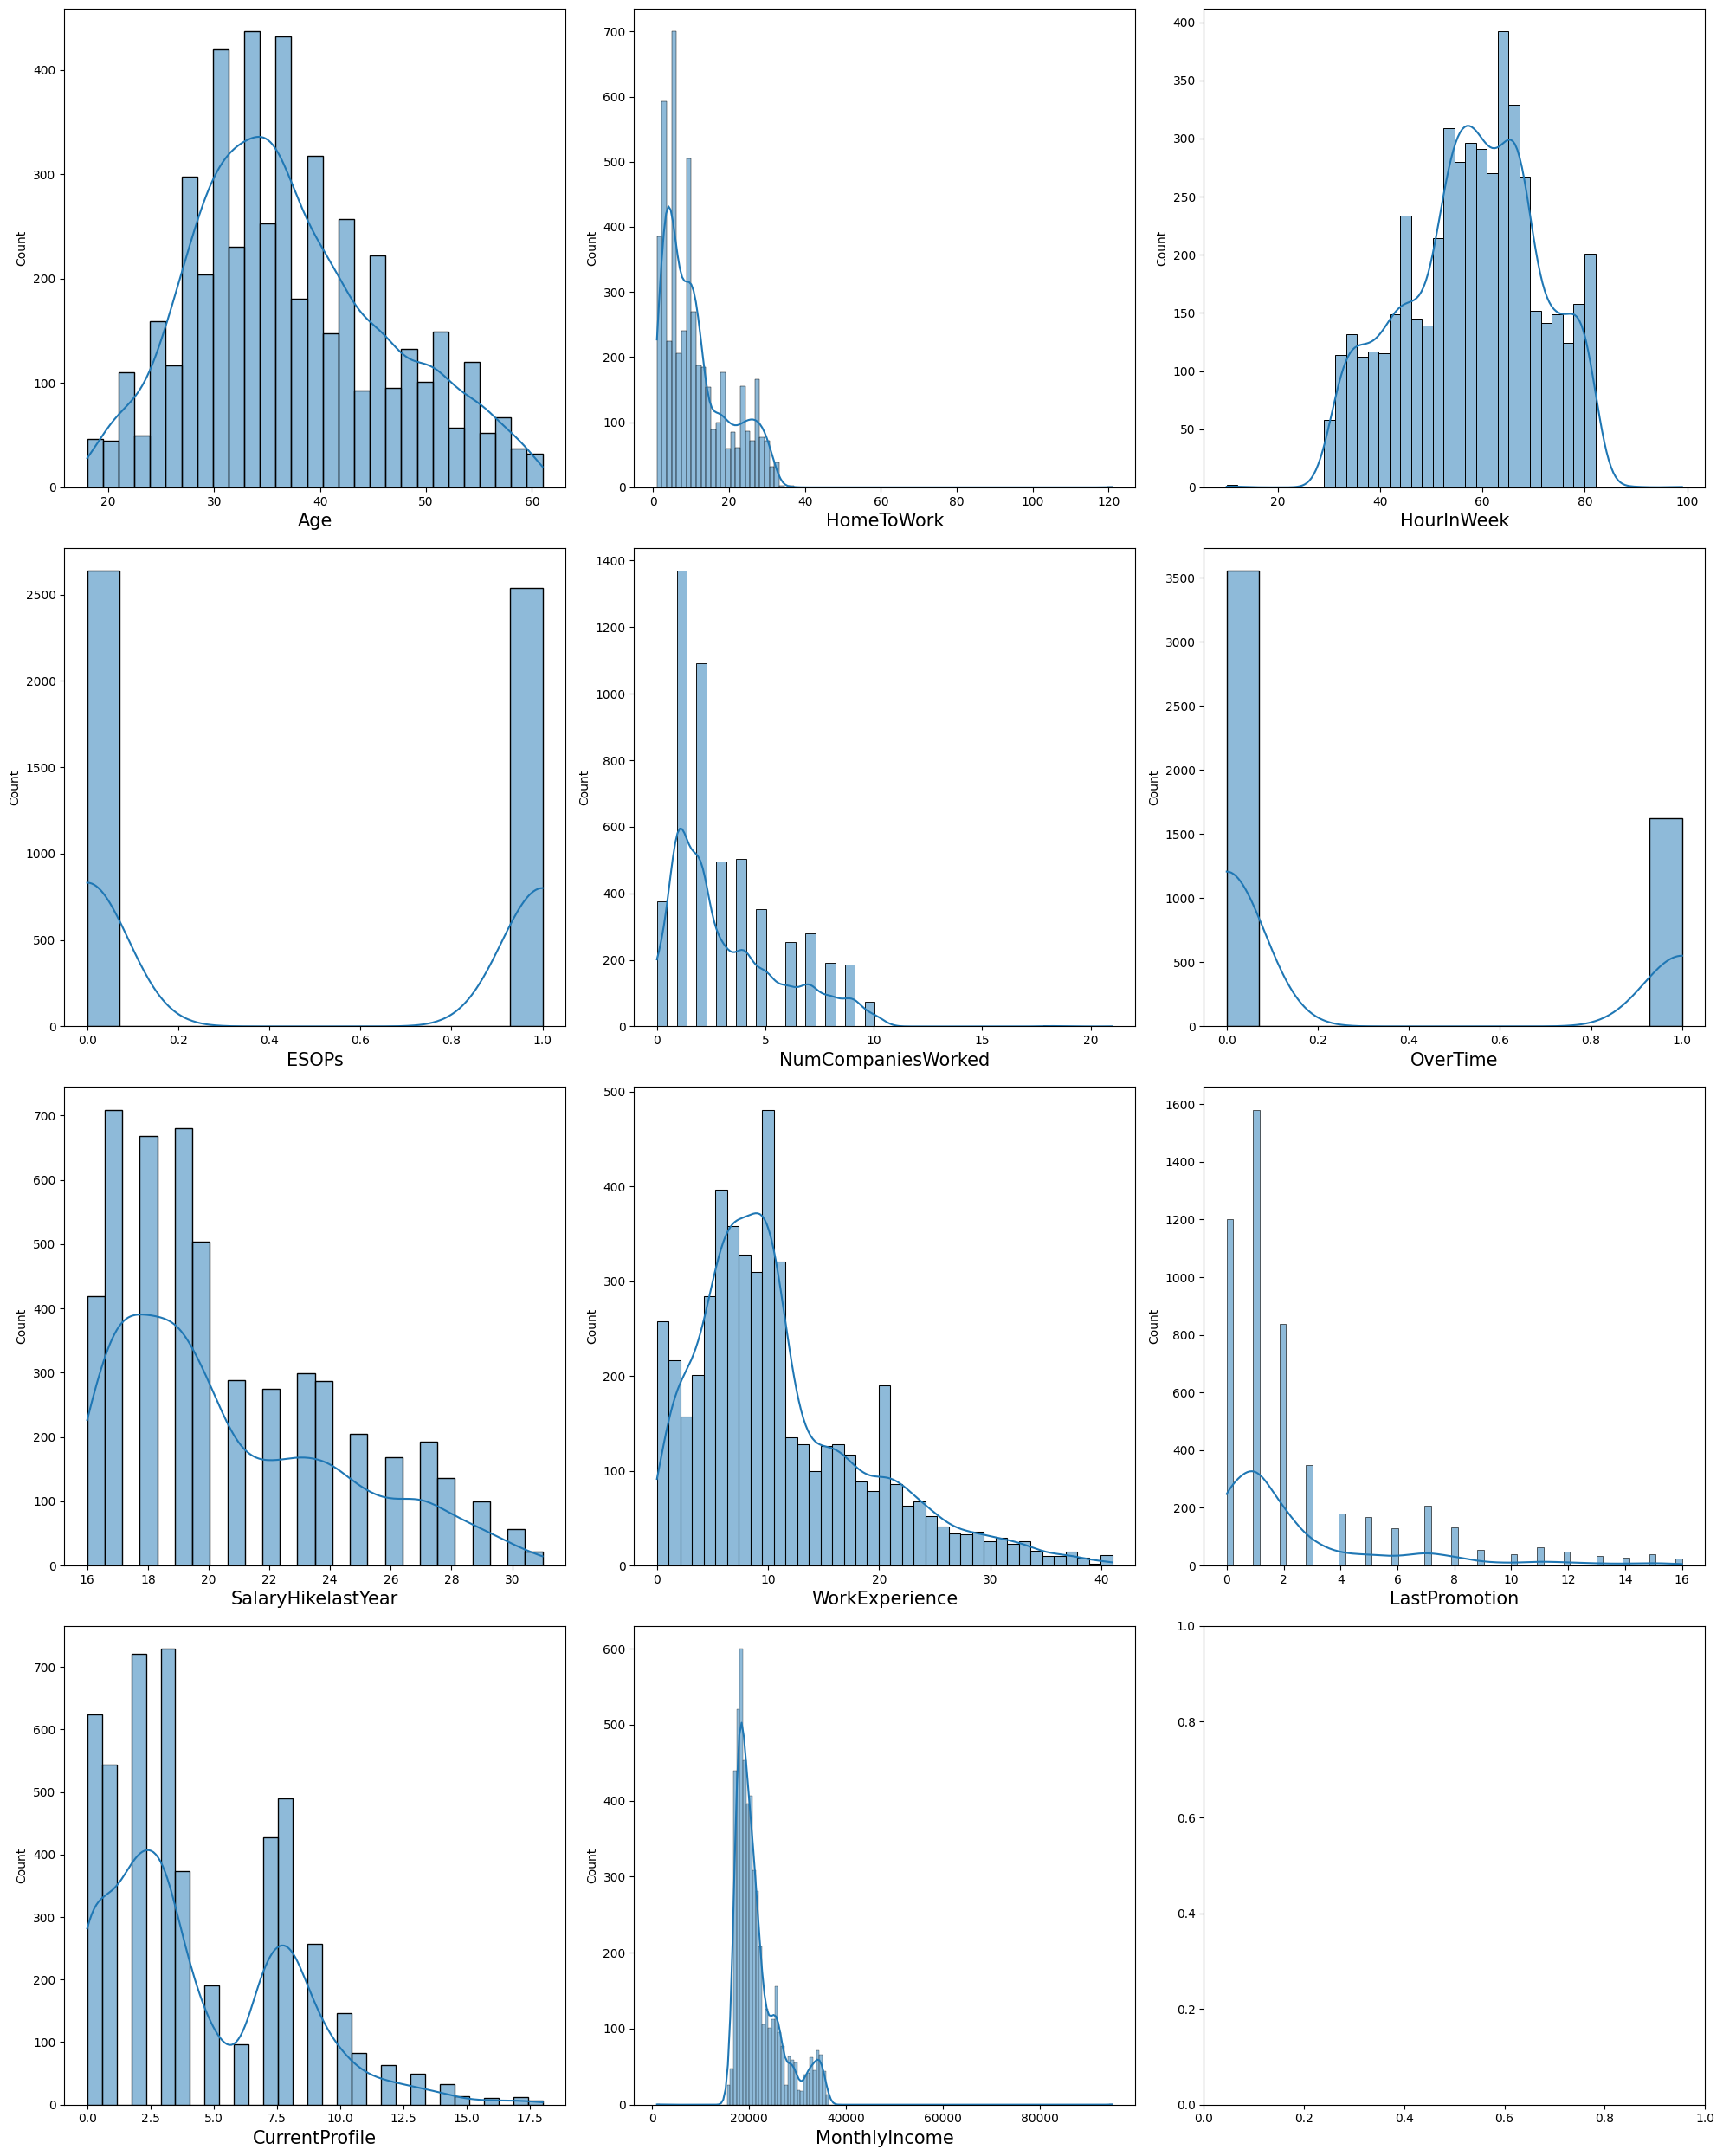

In [18]:
fig, axs = plt.subplots(nrows=4, ncols=3, figsize=(20,25))
axs = axs.flatten()

for i, col in enumerate(numerical):
    sns.histplot(data=data2, x=col, kde=True, ax=axs[i])
    axs[i].set_xlabel(col, fontsize=15)
fig.tight_layout()
plt.show()

Age is slightly right-skewed.

HomeToWork, NumCompaniesWorked, SalaryHikelastYear, WorkExperience, LastPromotion, MonthlyIncome are highly right-skewed.

HourInWeek and CurrentProfile are bimodal. Many employees work for around 57-58 hours or 66-67 hours. Many employees working in the current profile for 2.5 years or 7.5 years.

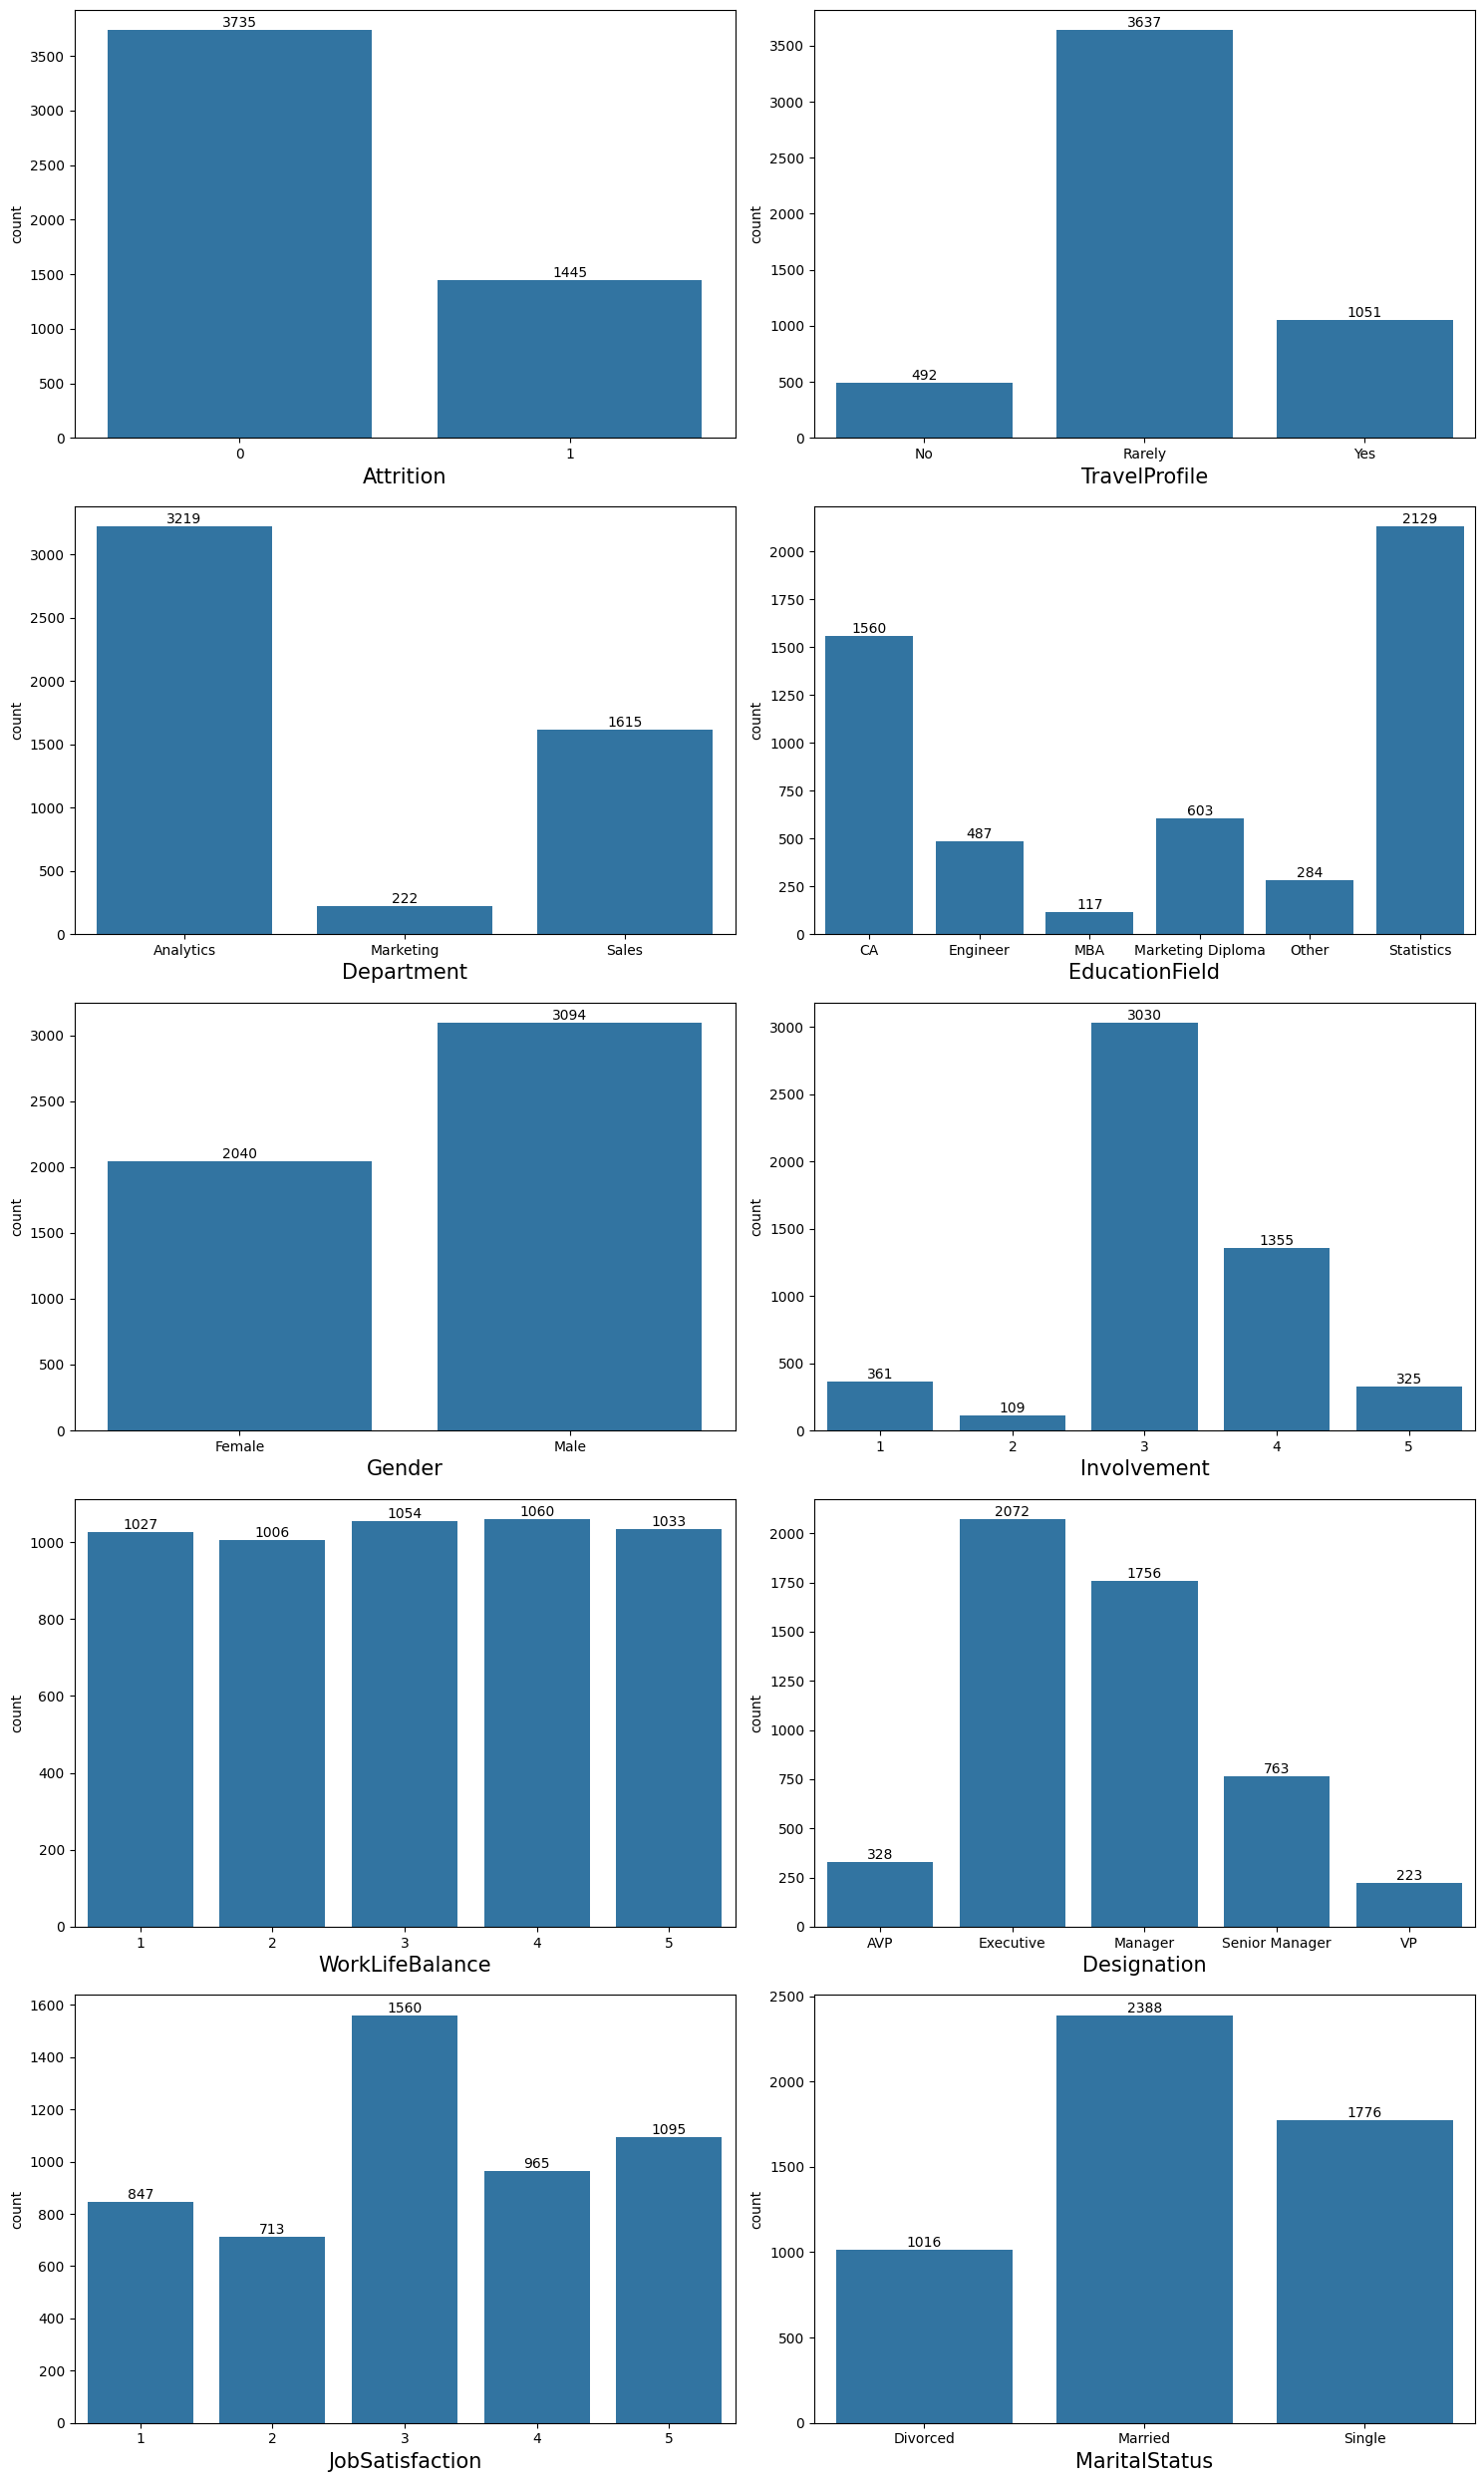

In [19]:
fig, axs = plt.subplots(nrows=5, ncols=2, figsize=(15,25))
axs = axs.flatten()

for i, col in enumerate(categorical):
    ax=axs[i]
    sns.countplot(data=data2, x=col, ax=ax)
    ax.set_xlabel(col, fontsize=15)
    fig.tight_layout()

    for container in ax.containers:
        ax.bar_label(container)
        
plt.show()

46% employees are married. Also, there are 60% men and 40% women.

30% employees are not satisfied with the job. Another 30% employees are neither satisfied nor unsatisfied.

40% employees are in executive level, 33% employees are managers, 15% are senior managers and rest ~10% are in vice president and assistant vice president combined.

40% employees are not happy with work-life balance, around 20% are neutral.

9% employees are not involving in the engagement activity organised by HR team. 60% employees involve but not regularly.

Most of the employees have to travel rarely, 20% should travel regularly and 10% are not supposed to travel at all in their job profile.

Attrition flag - 28% yes and rest no.

## Bivariate Analysis

In [20]:
data2.dtypes

Attrition             category
Age                      Int64
TravelProfile         category
Department            category
HomeToWork             float64
EducationField        category
Gender                category
HourInWeek             float64
Involvement           category
WorkLifeBalance       category
Designation           category
JobSatisfaction       category
ESOPs                    int64
NumCompaniesWorked       int64
OverTime                 int64
SalaryHikelastYear     float64
WorkExperience         float64
LastPromotion          float64
CurrentProfile         float64
MaritalStatus         category
MonthlyIncome          float64
dtype: object

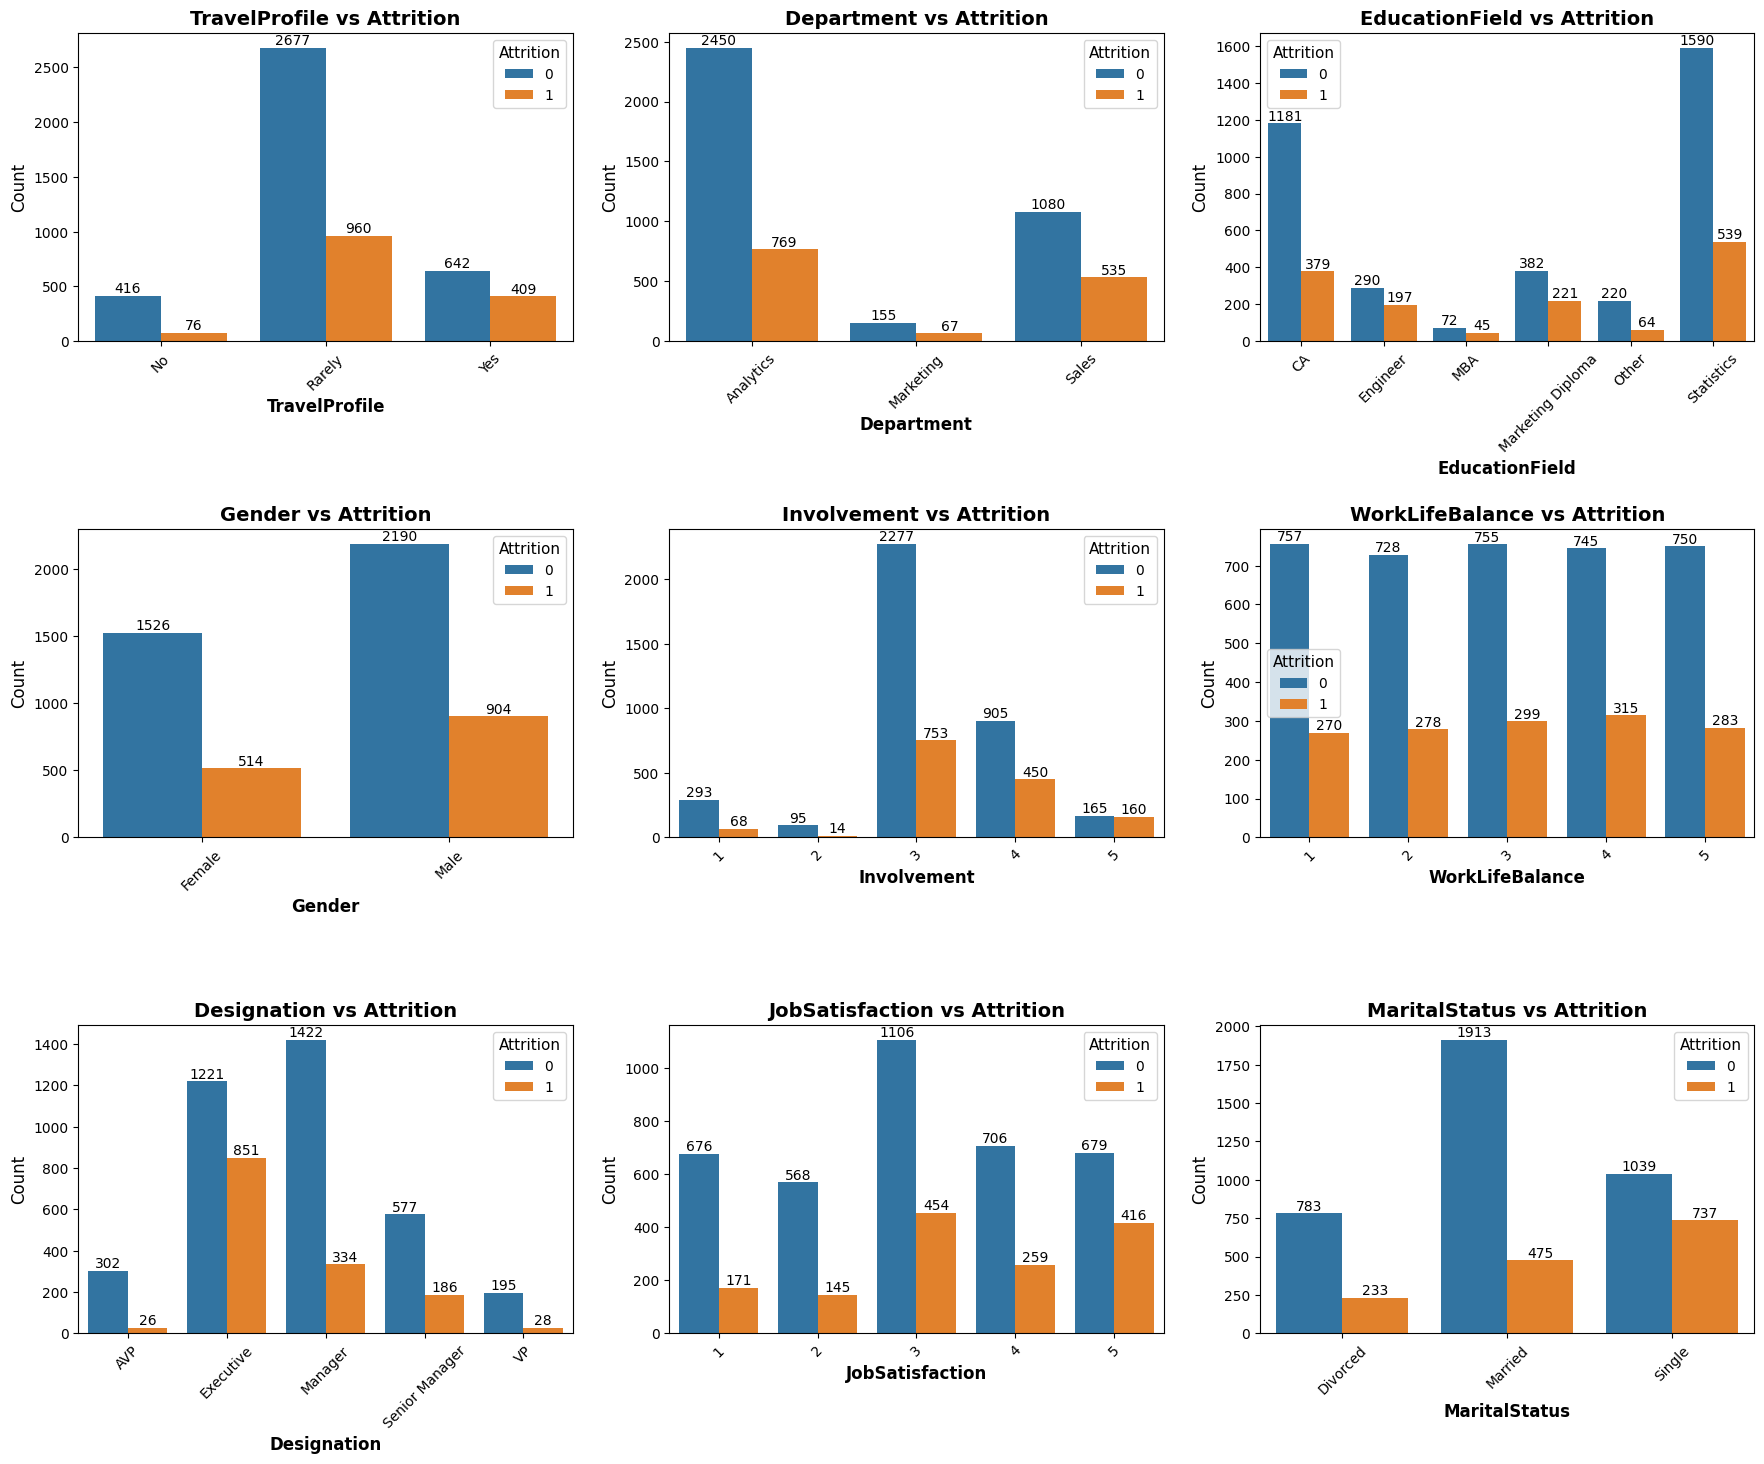

In [21]:
categorical2 = ['TravelProfile', 'Department', 'EducationField', 'Gender', 'Involvement', 'WorkLifeBalance', 'Designation',
        'JobSatisfaction', 'MaritalStatus']

fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(18, 15))
axs = axs.flatten()

for i, col in enumerate(categorical2):
    ax = axs[i]
    
    sns.countplot(data=data2, x=col, hue='Attrition', ax=ax)
    
    ax.set_xlabel(col, fontsize=12, fontweight='bold')
    ax.set_ylabel('Count', fontsize=12)
    ax.set_title(f'{col} vs Attrition', fontsize=14, fontweight='bold')
    
    ax.tick_params(axis='x', rotation=45)
    
    for container in ax.containers:
        ax.bar_label(container, fontsize=10)
    
    ax.legend(title='Attrition', fontsize=10, title_fontsize=11)

plt.tight_layout(pad=2.0)
plt.show()

### Observations:

1. There are high percentage of attrition from the given data in the category of Travel Profile = Yes. ~38% who travel regularly as per their job requirement have resigned and ~26% who travel rarely for work requirement have left. However, only 15.4% employees have resigned from the category Travel Profile = No.
2. As we can see from the countplot, there are high number of attritions in Sales department i.e ~33% followed by Marketing department which has ~30% attrition rate. Analytics department has ~23% attrition rate.
3. Attrition is disproportionately concentrated among MBA, Marketing Diploma, and Engineering graduates. Despite representing a smaller share of the employee base compared to Statistics and CA graduates, these categories exhibit the highest attrition rates.
4. Men have more attrition rate then women.
5. **Contrary to expectations, employees with higher participation in HR activities show elevated attrition rates, suggesting that engagement does not necessarily translate into retention.**
6. Very high attrition rate among executives as expected followed by Senior managers and then Manager position.
7. **Another unexpected observation is employees who have rated Highly satisifed have high attrition rate followed by employees who rated Neutral and Satisifed.**
8. Employees who are single and not married yet have high attrition rate as expected as married or divorced employees usually seek stability and do not take the risk of switching jobs often.
9. No such trend observed in WorkLifeBalance as all the ratings show almost the same attrition rate.

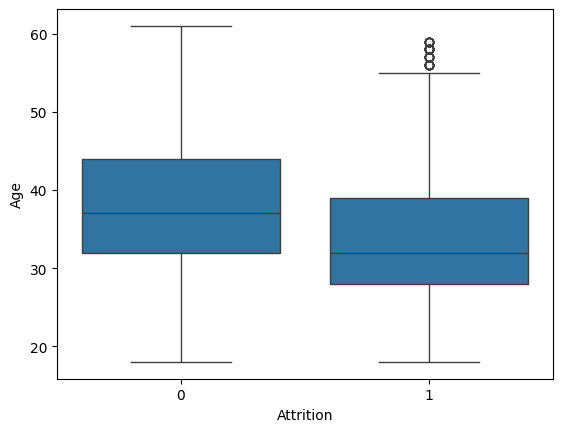

In [22]:
sns.boxplot(data=data2, y = "Age", x = "Attrition");

Younger employees aged in the range of 27-40 contribute to high attrition rate.

In [23]:
data2['HomeToWork_bin'] = pd.cut(data2['HomeToWork'], bins=[0,20,40,60,80,100,120,140])
attrition_rate = (
    data2.groupby('HomeToWork_bin')['Attrition']
      .value_counts(normalize=True)
      .rename("AttritionRate")
      .reset_index()
)
print(attrition_rate)

   HomeToWork_bin Attrition  AttritionRate
0         (0, 20]         0       0.742822
1         (0, 20]         1       0.257178
2        (20, 40]         0       0.654888
3        (20, 40]         1       0.345112
4        (40, 60]         0       0.000000
5        (40, 60]         1       0.000000
6        (60, 80]         0       0.000000
7        (60, 80]         1       0.000000
8       (80, 100]         0       0.000000
9       (80, 100]         1       0.000000
10     (100, 120]         0       0.000000
11     (100, 120]         1       0.000000
12     (120, 140]         0       1.000000
13     (120, 140]         1       0.000000


We can see that distance from Home to Office directly relates with the attrition rate. For 20-40 KMs bin, there is a spike in attrition rate as compared to 0-20 KMs bin.

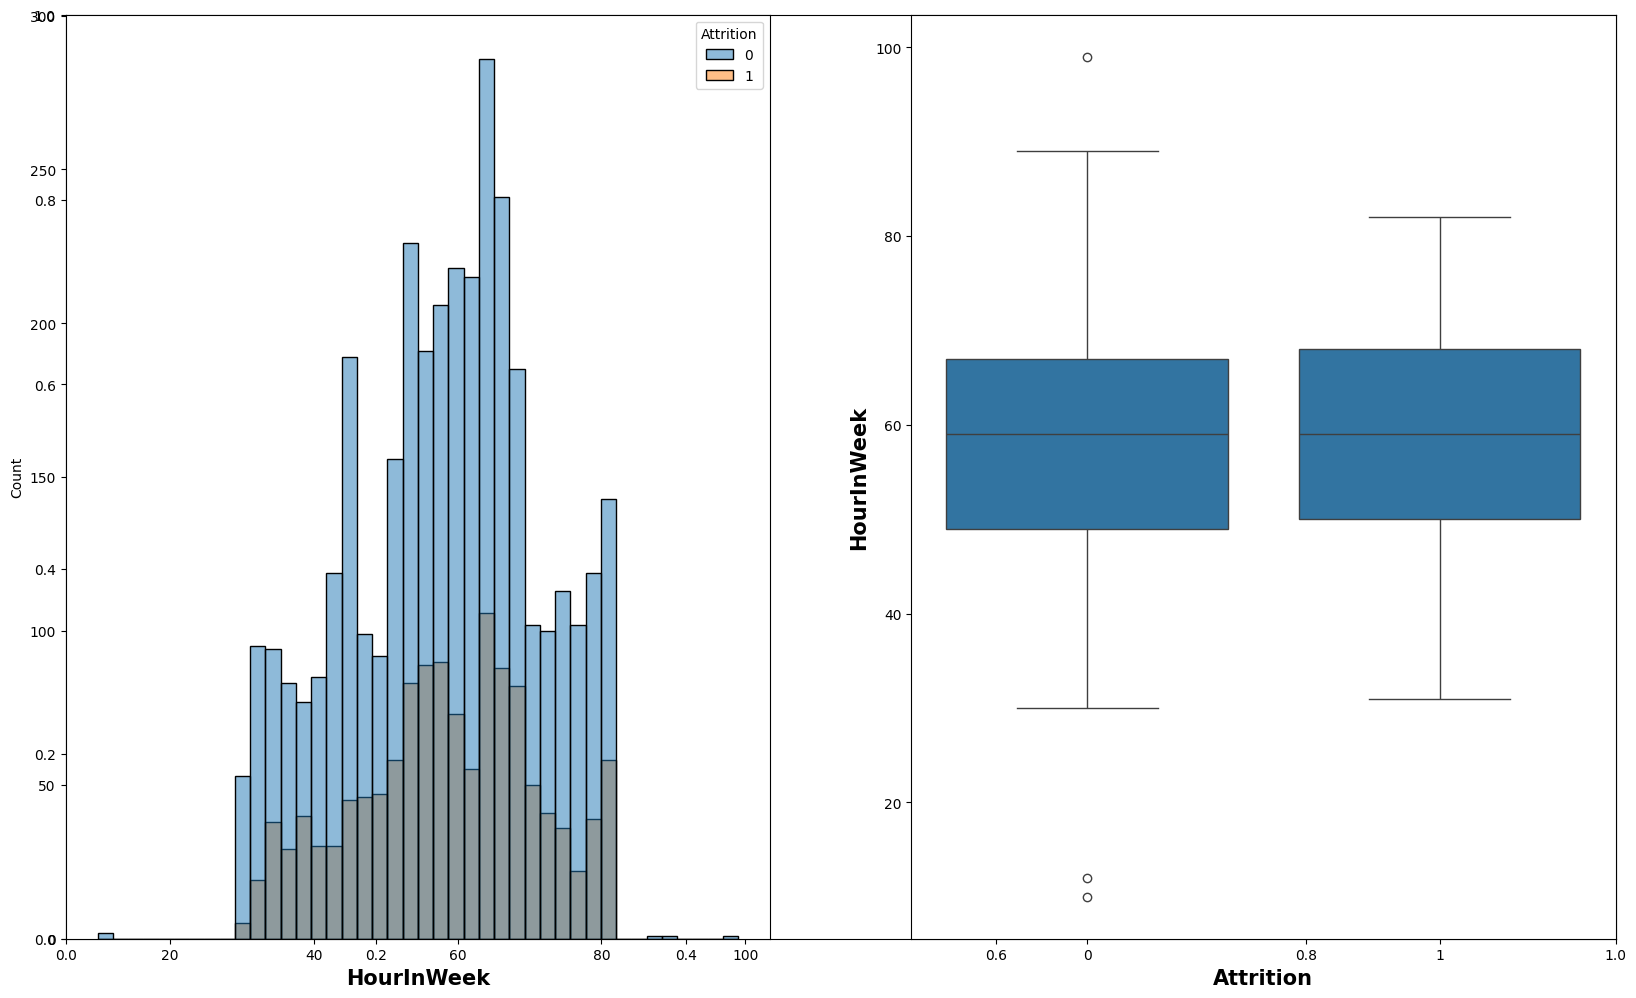

In [24]:
plt.subplots(figsize=(20,12))
plt.subplot(1,2,1)
sns.histplot(data=data2, x='HourInWeek', hue='Attrition')
plt.xlabel(xlabel="HourInWeek", fontsize=15, fontweight='bold')

plt.subplot(1,2,2)
sns.boxplot(data=data2, y='HourInWeek', x='Attrition')
plt.ylabel(ylabel="HourInWeek", fontsize=15, fontweight='bold')
plt.xlabel(xlabel="Attrition", fontsize=15, fontweight='bold');

In [25]:
data2['HourInWeek_bin'] = pd.cut(data2['HourInWeek'], bins=[0,20,40,60,80,100,120,140])
attrition_rate = (
    data2.groupby('HourInWeek_bin')['Attrition']
      .value_counts(normalize=True)
      .rename("AttritionRate")
      .reset_index()
)
print(attrition_rate)

   HourInWeek_bin Attrition  AttritionRate
0         (0, 20]         0       1.000000
1         (0, 20]         1       0.000000
2        (20, 40]         0       0.750000
3        (20, 40]         1       0.250000
4        (40, 60]         0       0.728471
5        (40, 60]         1       0.271529
6        (60, 80]         0       0.740029
7        (60, 80]         1       0.259971
8       (80, 100]         0       0.657143
9       (80, 100]         1       0.342857
10     (100, 120]         0       0.000000
11     (100, 120]         1       0.000000
12     (120, 140]         0       0.000000
13     (120, 140]         1       0.000000


Attrition is seen in bins 20-40 hrs, 40-60 hrs, 60-80 hrs and 80-100 hrs. However, employees working for 80+ hours in a week are more likely to leave with ~34% attrition rate as compared to other bins. The other three bin ranges have attrition rate of 25-27%.

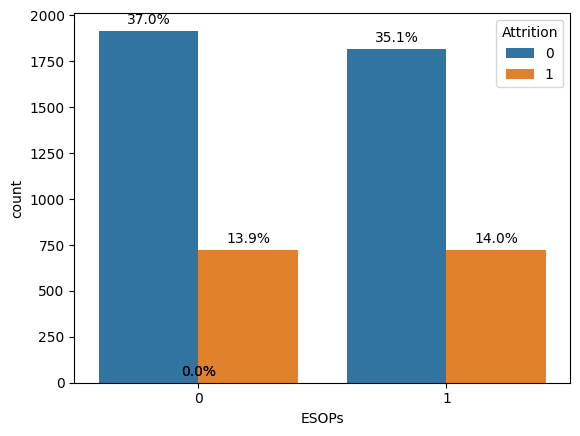

In [26]:
ax = sns.countplot(data=data2, x="ESOPs", hue="Attrition")

# Calculate total count for normalization
total = len(data2)

# Loop through bars and annotate with percentage
for p in ax.patches:
    height = p.get_height()
    percentage = f'{100 * height / total:.1f}%'
    ax.annotate(percentage,
                (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom', fontsize=10, color='black', xytext=(0, 3),
                textcoords='offset points')

plt.show()

There is no much difference in employees who own ESOPs and who do not own. Contrary to expectations, employees who have owned ESOPs have slightly more attrition rate.

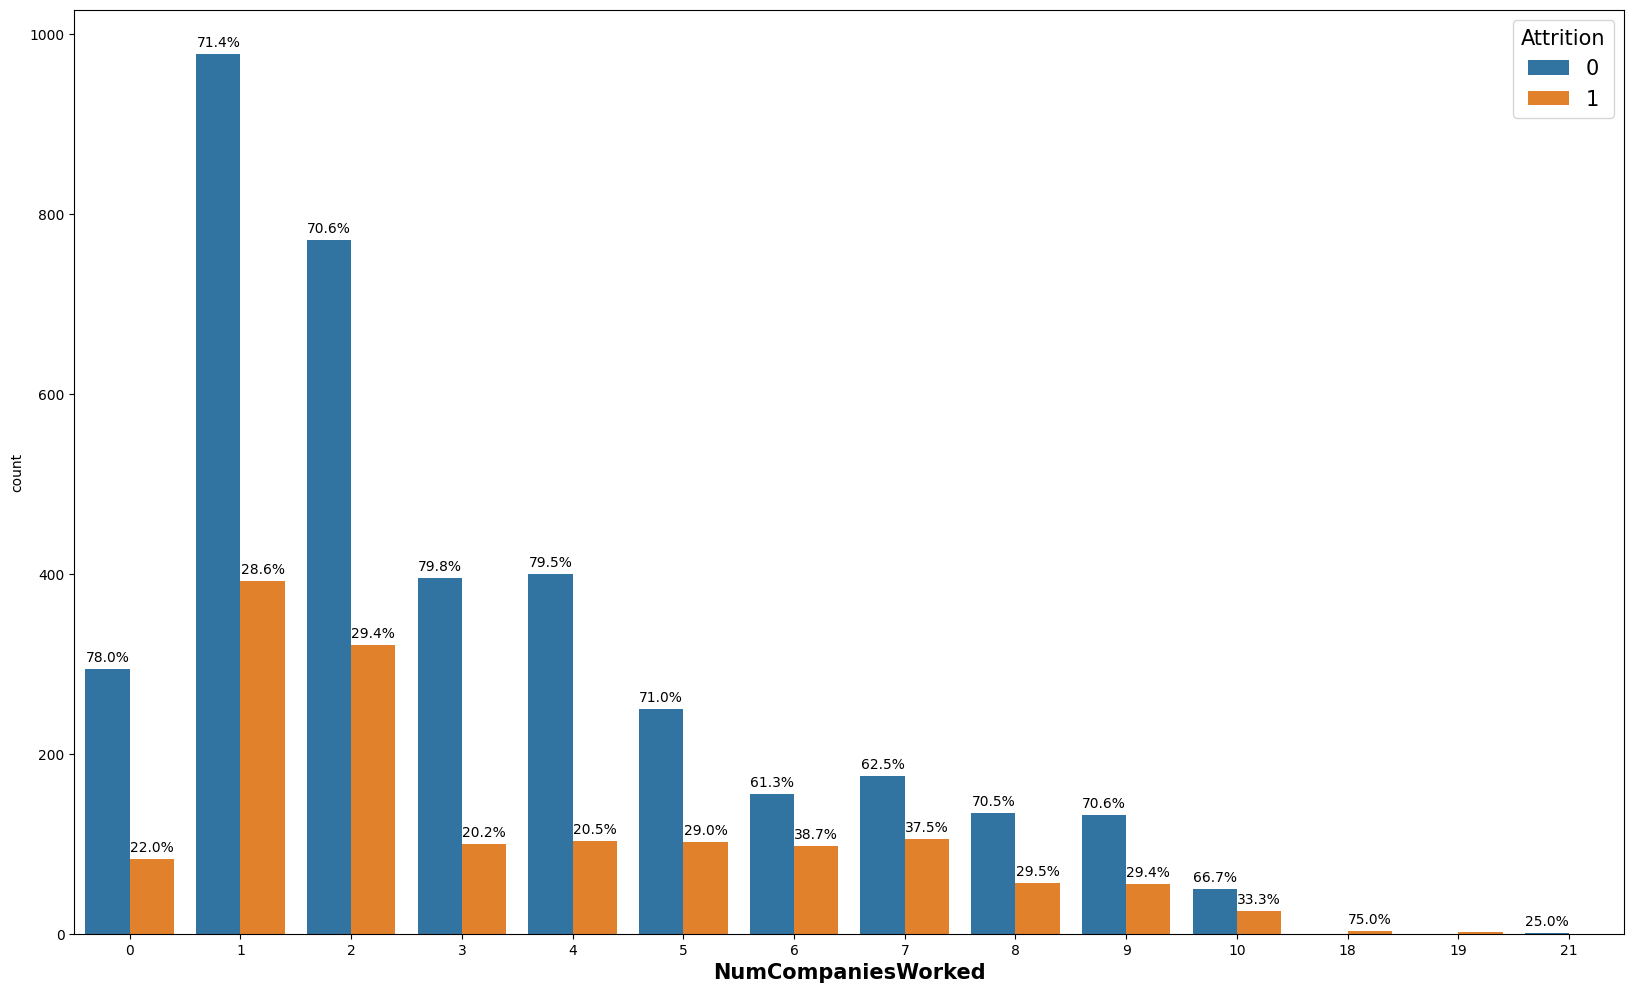

In [27]:
plt.figure(figsize=(20,12))
ax = sns.countplot(data=data2, x="NumCompaniesWorked", hue="Attrition")

# Loop through each x category
for i, bar_group in enumerate(zip(*[c.patches for c in ax.containers])):
    # bar_group = bars (Yes, No) for the same NumCompaniesWorked
    group_total = sum(bar.get_height() for bar in bar_group)
    
    for bar in bar_group:
        height = bar.get_height()
        if group_total > 0:  # avoid division by zero
            percentage = f'{100 * height / group_total:.1f}%'
            ax.annotate(percentage,
                        (bar.get_x() + bar.get_width() / 2., height),
                        ha='center', va='bottom', fontsize=10, color='black', xytext=(0, 3),
                        textcoords='offset points')
            
ax.set_xlabel("NumCompaniesWorked",fontsize=15, fontweight='bold');
ax.legend(title='Attrition', fontsize=15, title_fontsize=15)
plt.show()

Employees who worked in 6-7 companies have highest attrition rate followed by employees worked in 10 companies. Employees worked in 5 or more companies have high attritions as shown in the plot. Interestingly, employees worked in 1 or 2 companies also are more likely to leave.

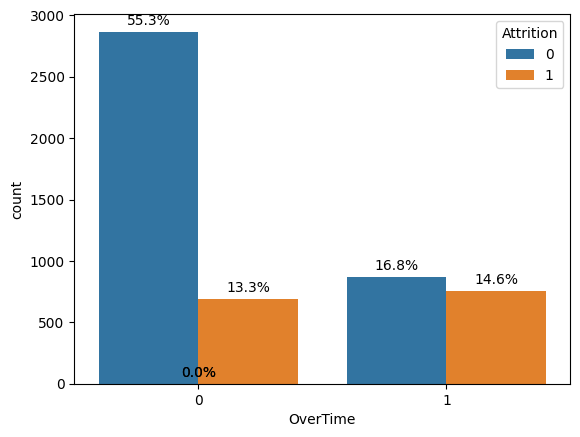

In [28]:
ax = sns.countplot(data=data2, x="OverTime", hue="Attrition")

# Calculate total count for normalization
total = len(data2)

# Loop through bars and annotate with percentage
for p in ax.patches:
    height = p.get_height()
    percentage = f'{100 * height / total:.1f}%'
    ax.annotate(percentage,
                (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom', fontsize=10, color='black', xytext=(0, 3),
                textcoords='offset points')

plt.show()

Another contrasting observation is employees eligible to be paid for overtime have high attrition rate.

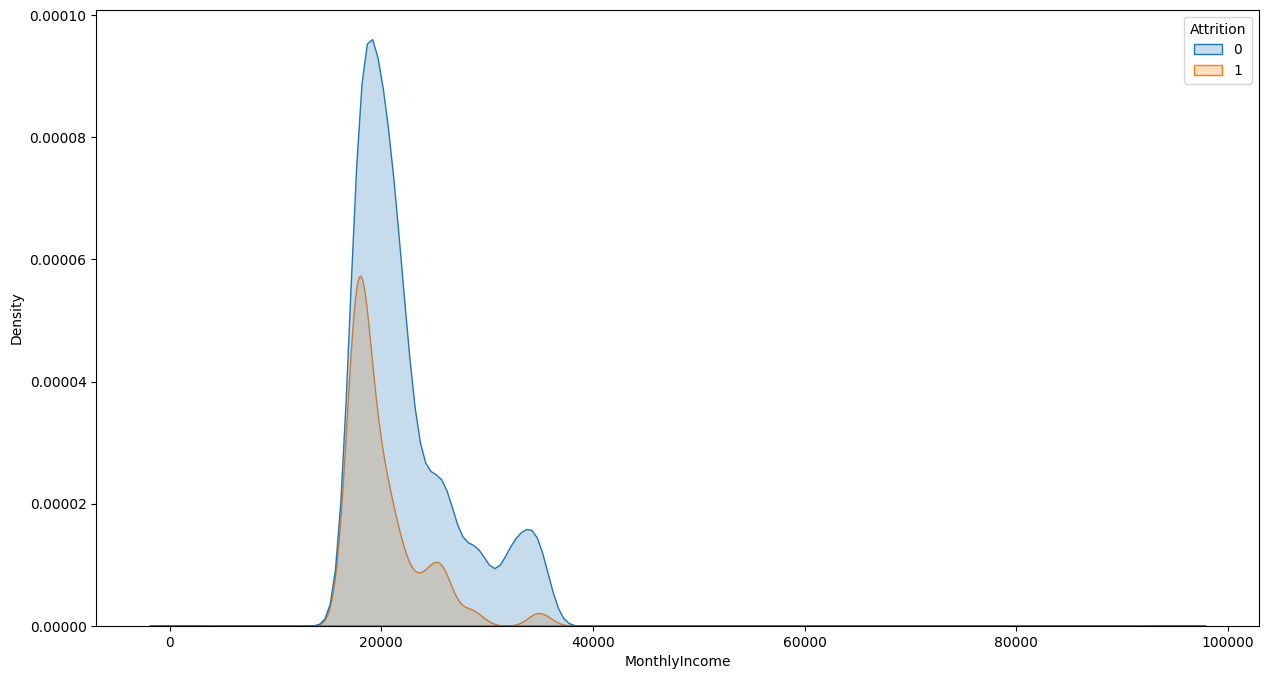

In [29]:
plt.figure(figsize=(15,8))
sns.kdeplot(data=data2, hue="Attrition", x="MonthlyIncome",fill=True);

High attritions observed among employees getting paid less than 18500.

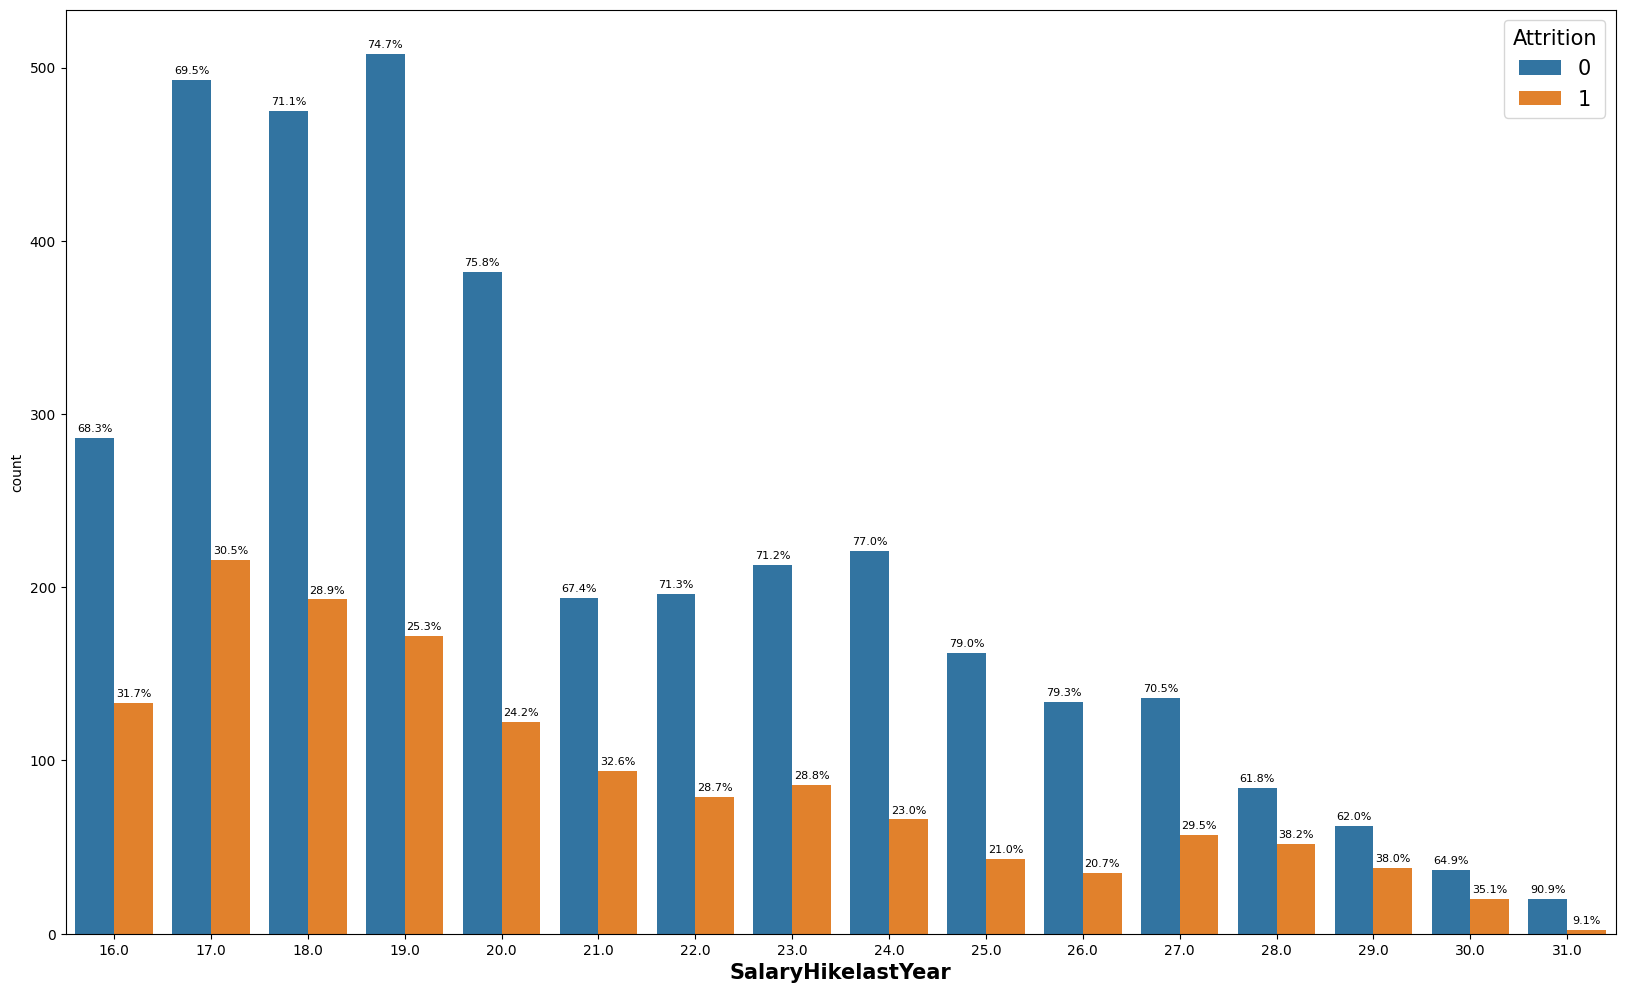

In [30]:
plt.figure(figsize=(20,12))
ax = sns.countplot(data=data2, x="SalaryHikelastYear", hue="Attrition")

# Loop through each x category
for i, bar_group in enumerate(zip(*[c.patches for c in ax.containers])):
    # bar_group = bars (Yes, No) for the same NumCompaniesWorked
    group_total = sum(bar.get_height() for bar in bar_group)
    
    for bar in bar_group:
        height = bar.get_height()
        if group_total > 0:  # avoid division by zero
            percentage = f'{100 * height / group_total:.1f}%'
            ax.annotate(percentage,
                        (bar.get_x() + bar.get_width() / 2., height),
                        ha='center', va='bottom', fontsize=8, color='black', xytext=(0, 3),
                        textcoords='offset points')
            
ax.set_xlabel("SalaryHikelastYear",fontsize=15, fontweight='bold');
ax.legend(title='Attrition', fontsize=15, title_fontsize=15)
plt.show()

No such strong trend observed with Salary hike vs Attrition. Employees with high salary hikes also have left.

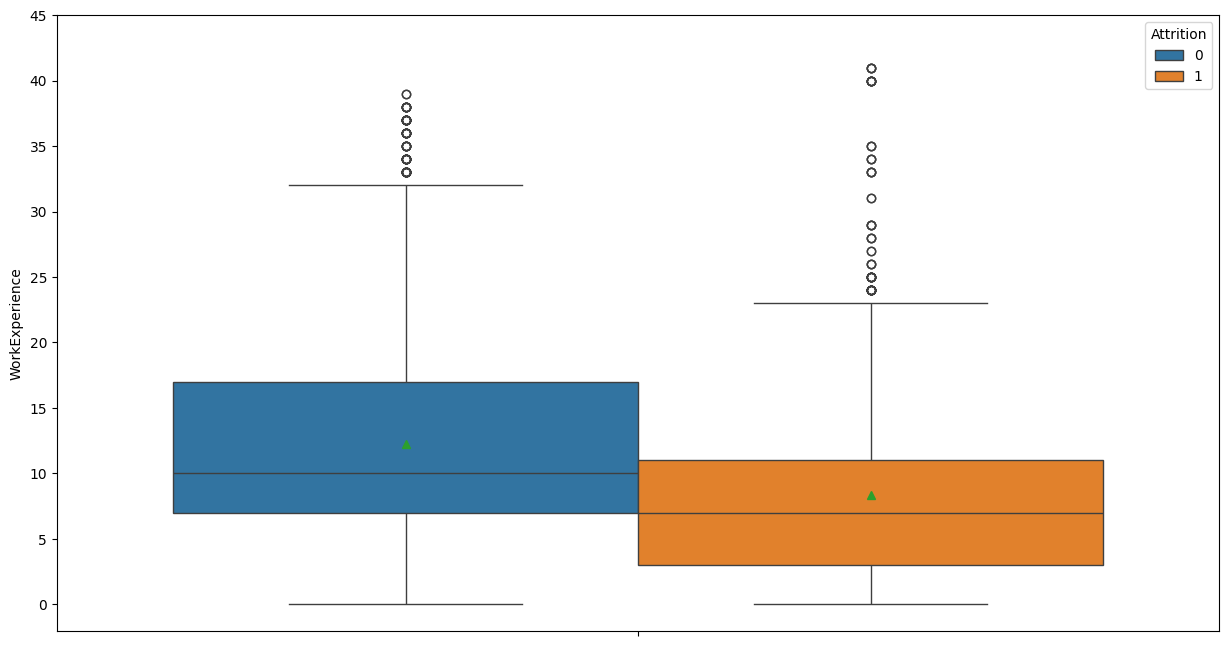

In [31]:
plt.figure(figsize=(15,8))
sns.boxplot(data=data2, hue="Attrition", y="WorkExperience", showmeans=True)
plt.yticks(ticks=np.arange(0,50,5));

Half of the employees who are leaving are around 0-7 years experienced. 
Average work experience of employees who are leaving have 8 years.
Among all the attritions, 50% have 3-12 years of work experience.

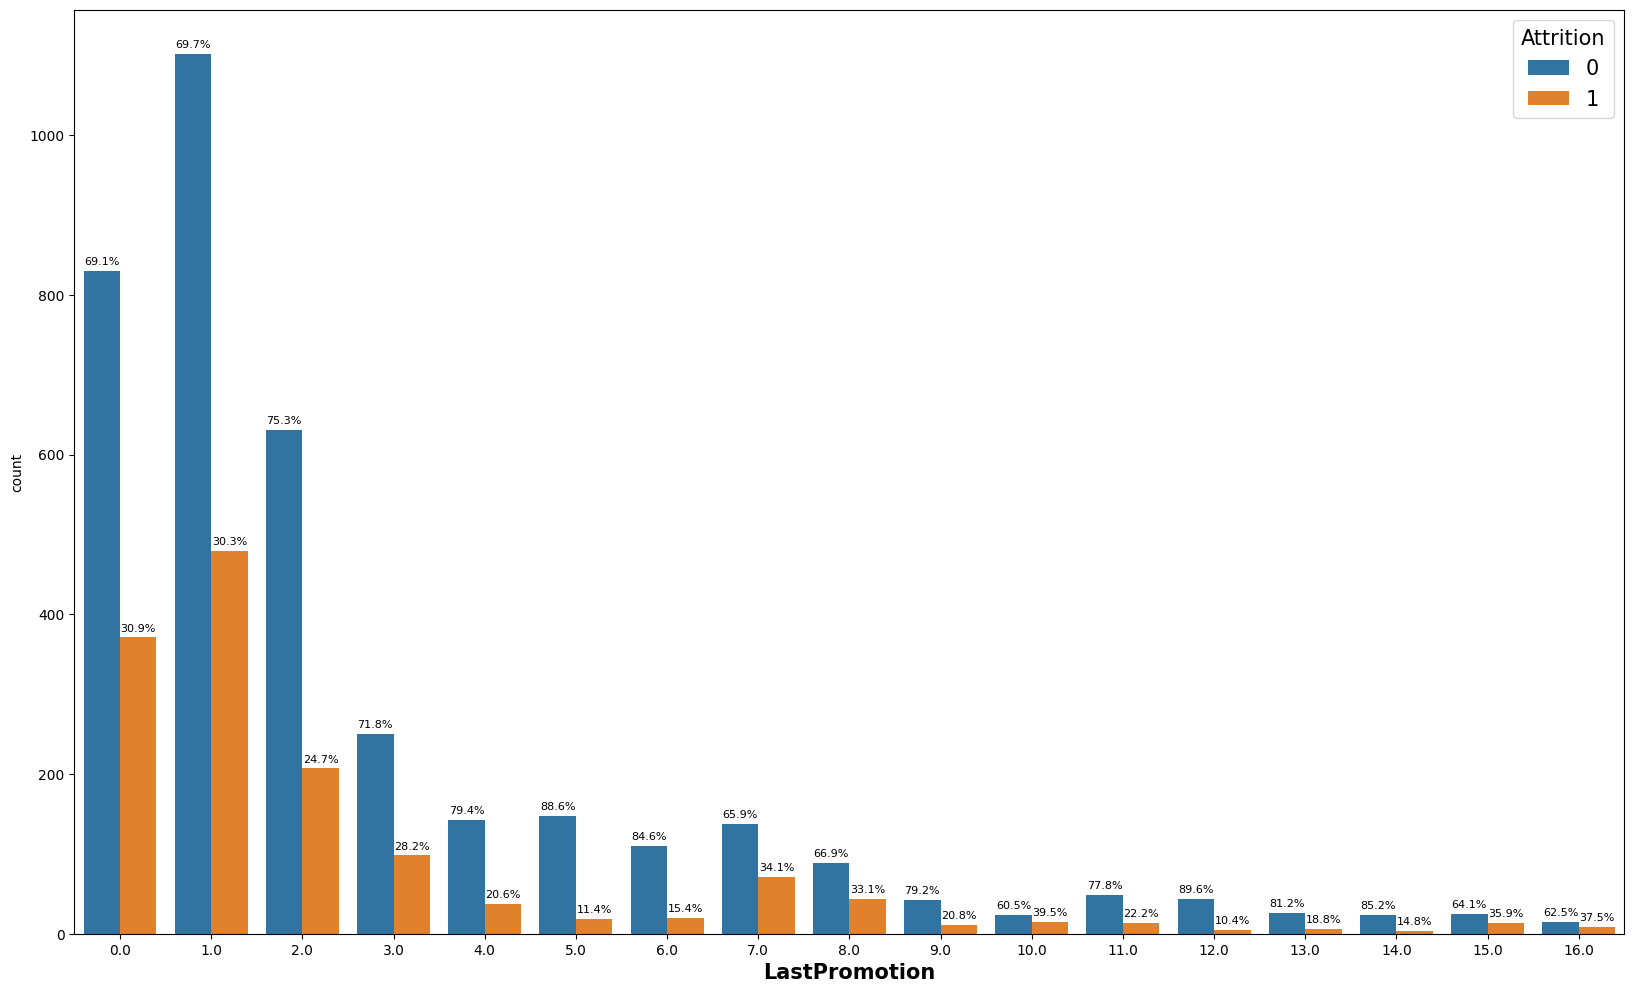

In [32]:
plt.figure(figsize=(20,12))
ax = sns.countplot(data=data2, x="LastPromotion", hue="Attrition")

# Loop through each x category
for i, bar_group in enumerate(zip(*[c.patches for c in ax.containers])):
    # bar_group = bars (Yes, No) for the same NumCompaniesWorked
    group_total = sum(bar.get_height() for bar in bar_group)
    
    for bar in bar_group:
        height = bar.get_height()
        if group_total > 0:  # avoid division by zero
            percentage = f'{100 * height / group_total:.1f}%'
            ax.annotate(percentage,
                        (bar.get_x() + bar.get_width() / 2., height),
                        ha='center', va='bottom', fontsize=8, color='black', xytext=(0, 3),
                        textcoords='offset points')
            
ax.set_xlabel("LastPromotion",fontsize=15, fontweight='bold');
ax.legend(title='Attrition', fontsize=15, title_fontsize=15)
plt.show()

High attritions observed with employees who got promoted recently or 1 year back. There are also other buckets like 7-8, 15-16 and 10 years since last promotion but, contribution to overall attritions is low as there are fewer employees in that bucket.

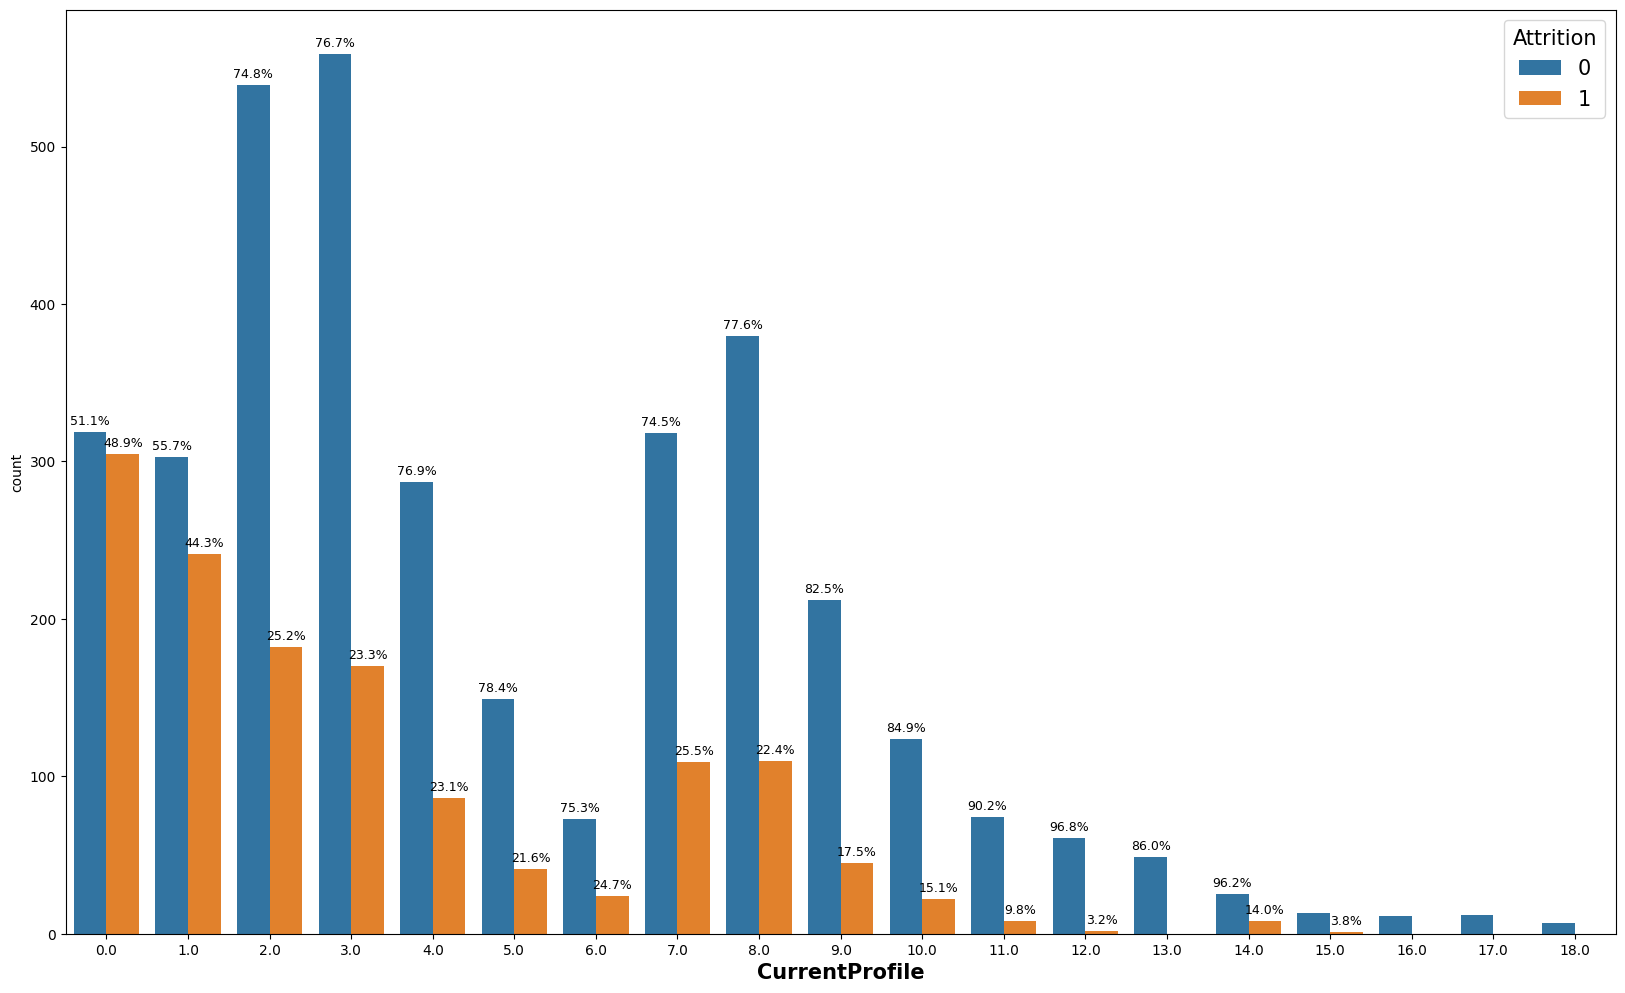

In [33]:
plt.figure(figsize=(20,12))
ax = sns.countplot(data=data2, x="CurrentProfile", hue="Attrition")

# Loop through each x category
for i, bar_group in enumerate(zip(*[c.patches for c in ax.containers])):
    # bar_group = bars (Yes, No) for the same NumCompaniesWorked
    group_total = sum(bar.get_height() for bar in bar_group)
    
    for bar in bar_group:
        height = bar.get_height()
        if group_total > 0:  # avoid division by zero
            percentage = f'{100 * height / group_total:.1f}%'
            ax.annotate(percentage,
                        (bar.get_x() + bar.get_width() / 2., height),
                        ha='center', va='bottom', fontsize=9, color='black', xytext=(0, 3),
                        textcoords='offset points')
            
ax.set_xlabel("CurrentProfile",fontsize=15, fontweight='bold');
ax.legend(title='Attrition', fontsize=15, title_fontsize=15)
plt.show()

Very high attritions among employees who are in current profile since 1 year.

## Correlation Analysis

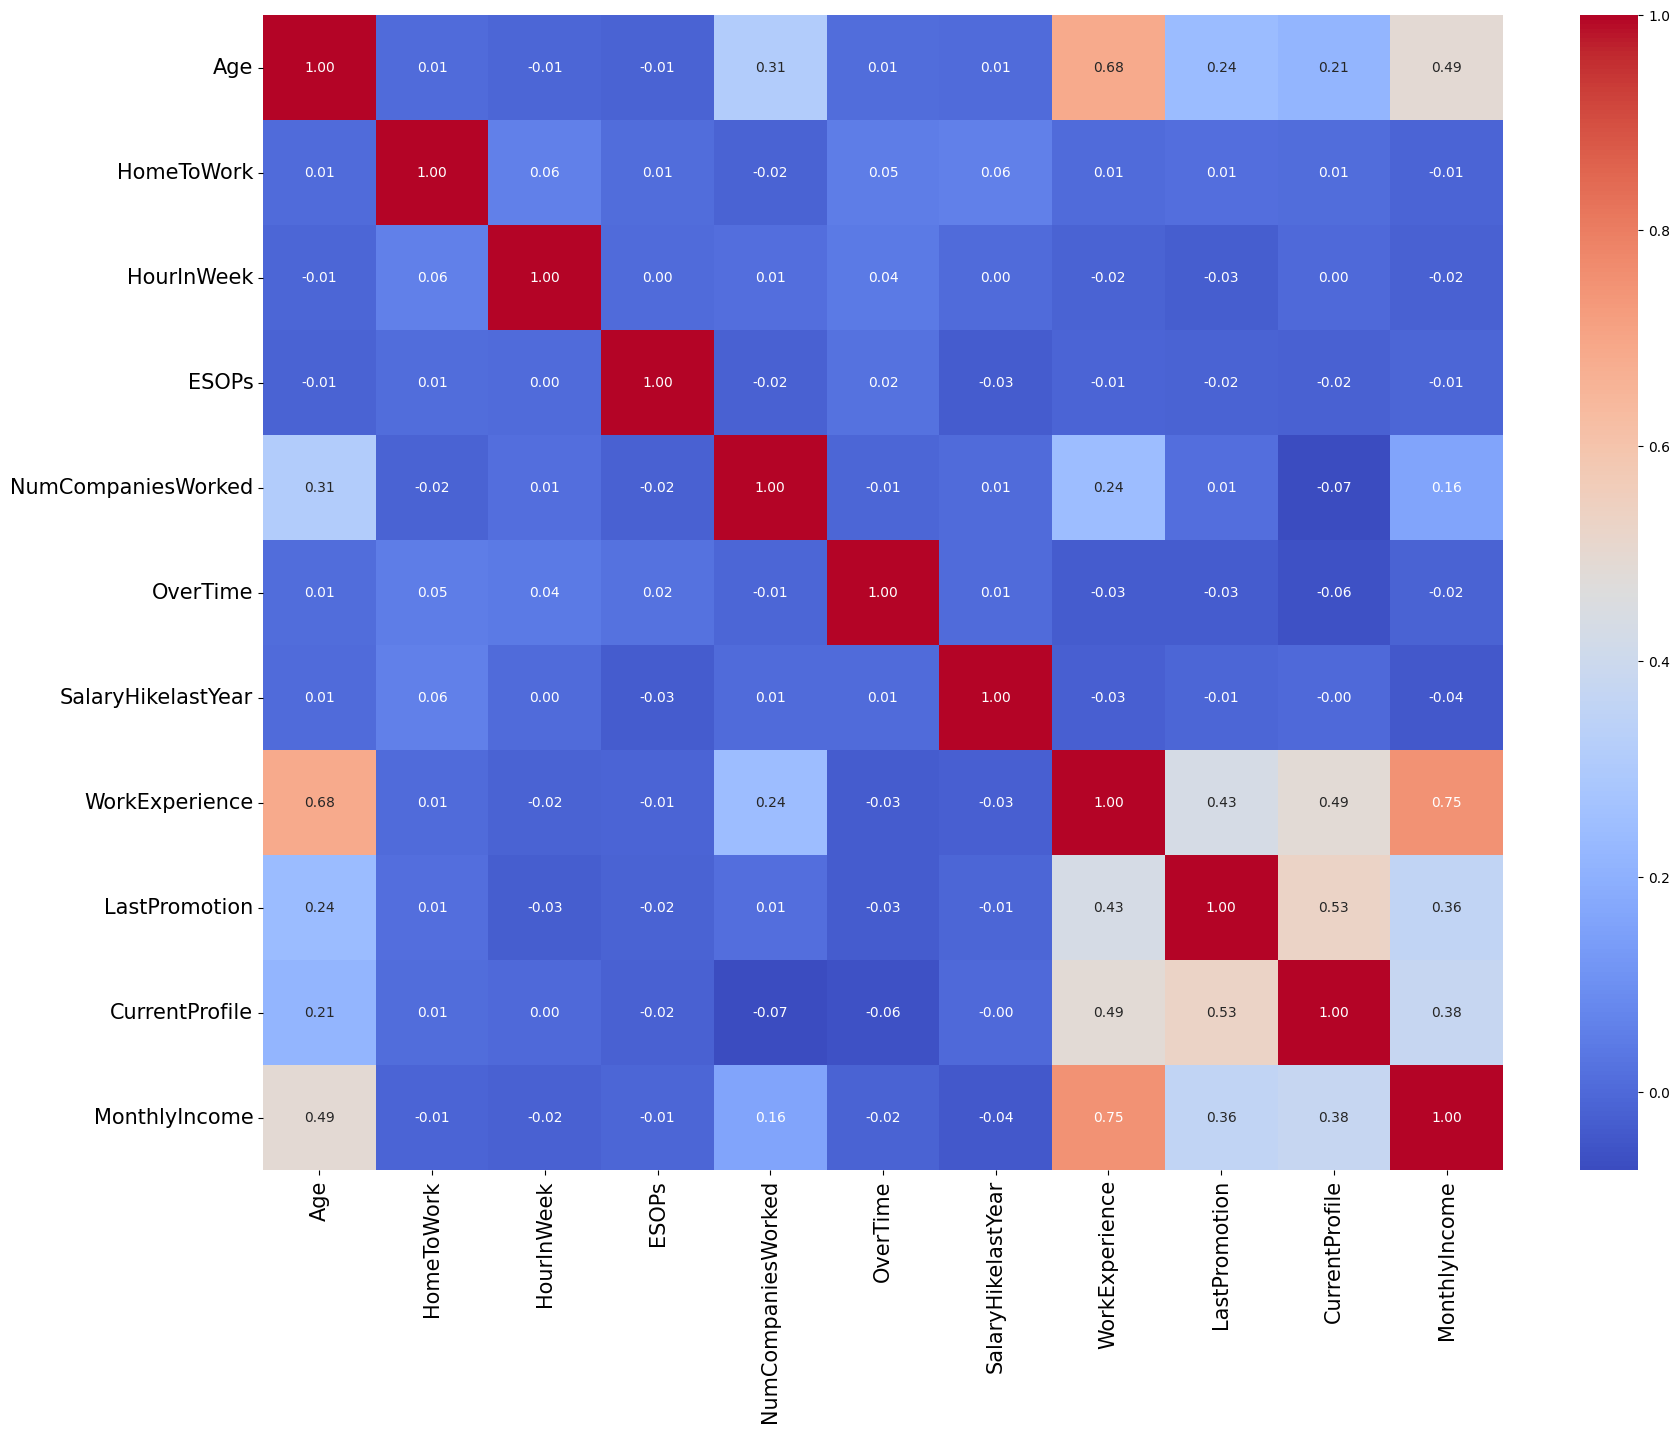

In [34]:
plt.figure(figsize=(20,15))
corr = data2.corr(numeric_only=True)
sns.heatmap(corr,cmap="coolwarm",annot=True,fmt=".2f")
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show();

### Observations:

1. Age and Work Experience are highly correlated.
2. Monthly Income and Work Experience are also highly correlated.
3. Last Promotion and Current Profile are moderately correlated with Work Experience.
4. Last Promotion and Current Profile are moderately correlated with each other.
5. Age and Monthly Income are moderately correlated.

## Multivariate Analysis

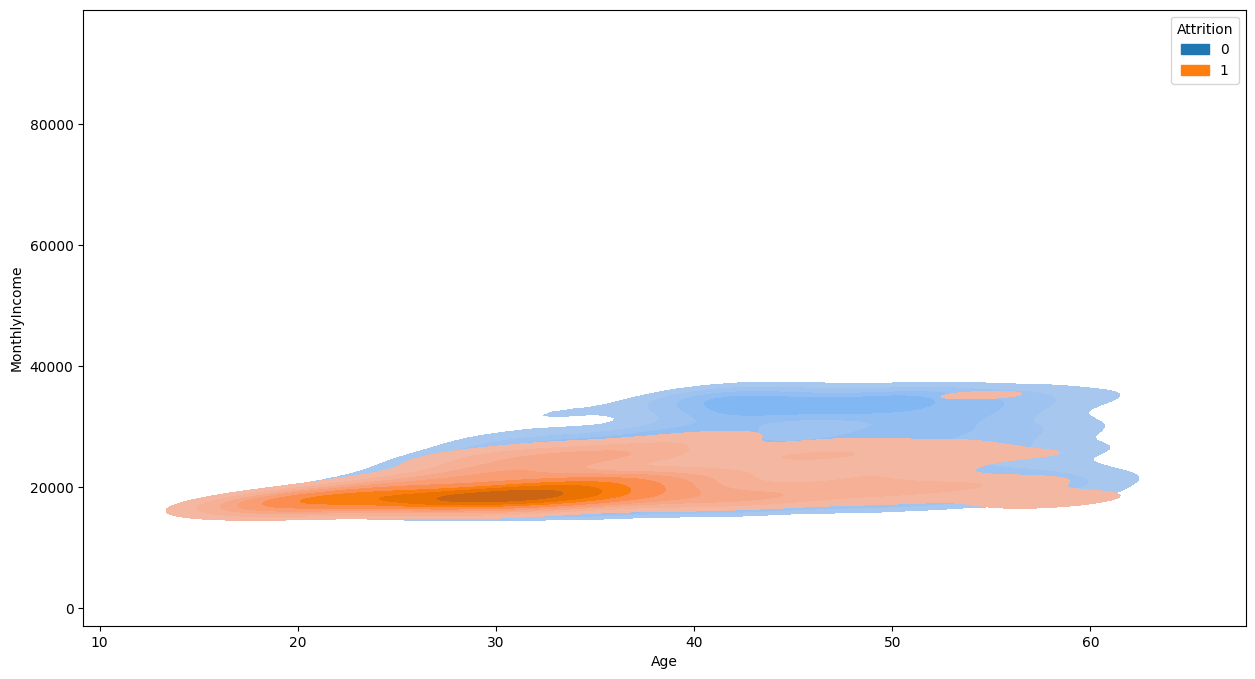

In [35]:
plt.figure(figsize=(15,8))
sns.kdeplot(data=data2, x="Age", y="MonthlyIncome", hue="Attrition", fill=True);

As we can high attritions happening among employees who are aged around 25-35 and with low salary.

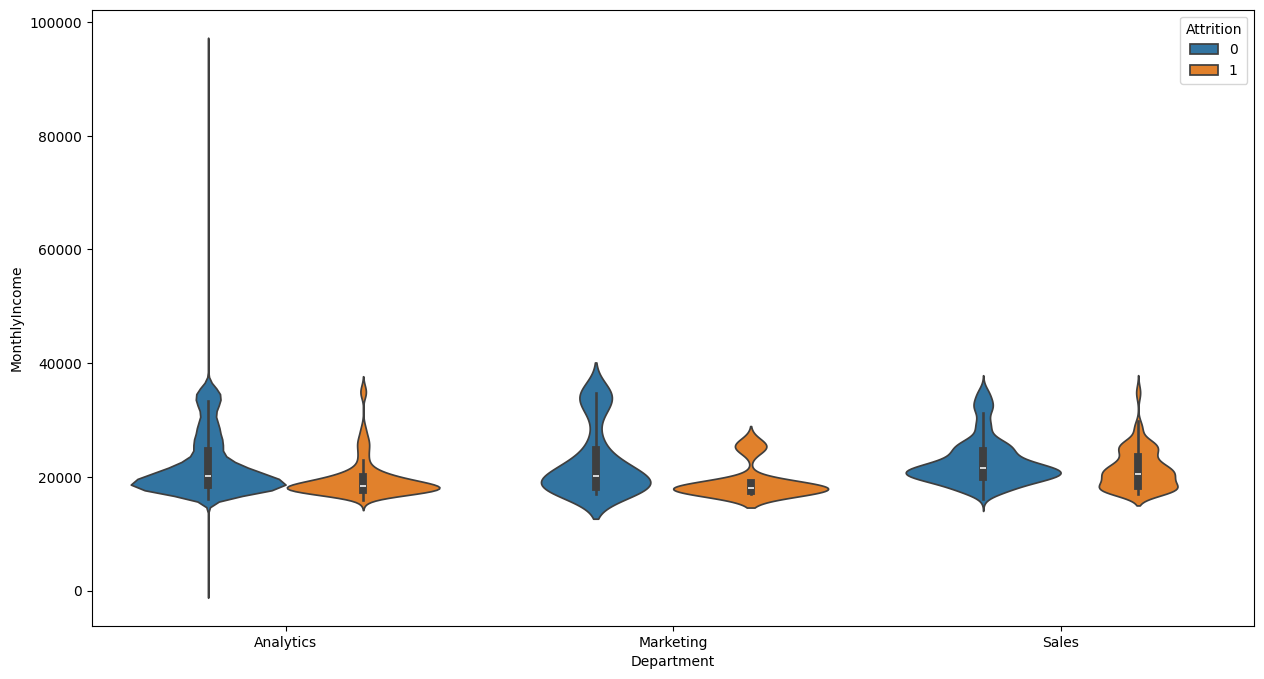

In [36]:
plt.figure(figsize=(15,8))
sns.violinplot(data=data2, x="Department", y="MonthlyIncome", hue="Attrition", fill=True);

High number of attritions seen in any given department with employees who are getting paid less. 

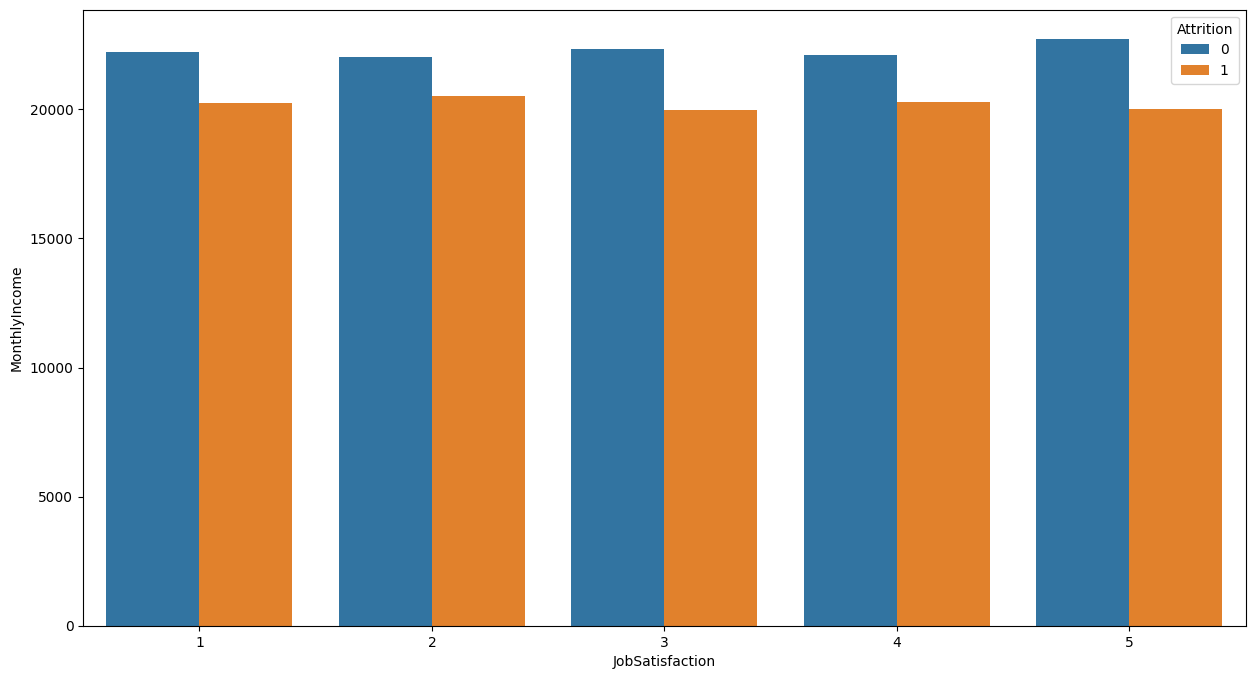

In [37]:
plt.figure(figsize=(15,8))
sns.barplot(data=data2, x="JobSatisfaction", y="MonthlyIncome", hue="Attrition", ci=None);

From the chart it is evident that employees irrespective of the Job satisfaction level are likely to leave if the average monthly income is less.

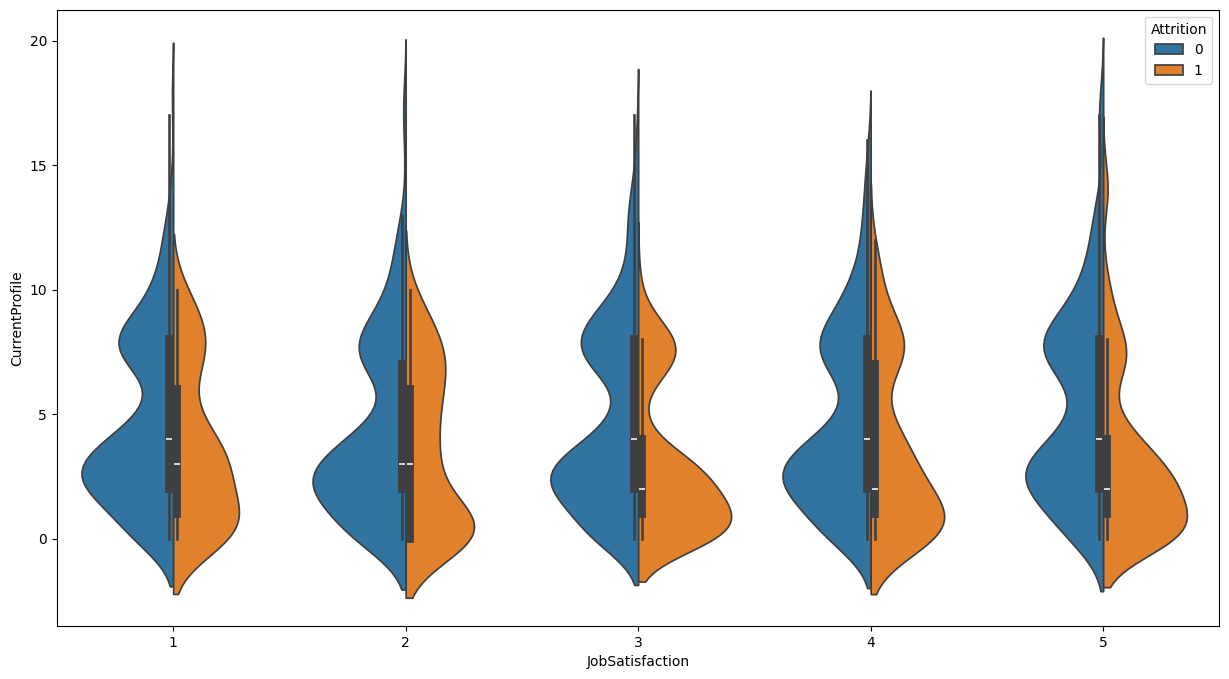

In [38]:
plt.figure(figsize=(15,8))
sns.violinplot(data=data2, x="JobSatisfaction", y="CurrentProfile", hue="Attrition", split=True);

Most employees who have not worked for long in the current profile though satisfied are leaving the company.

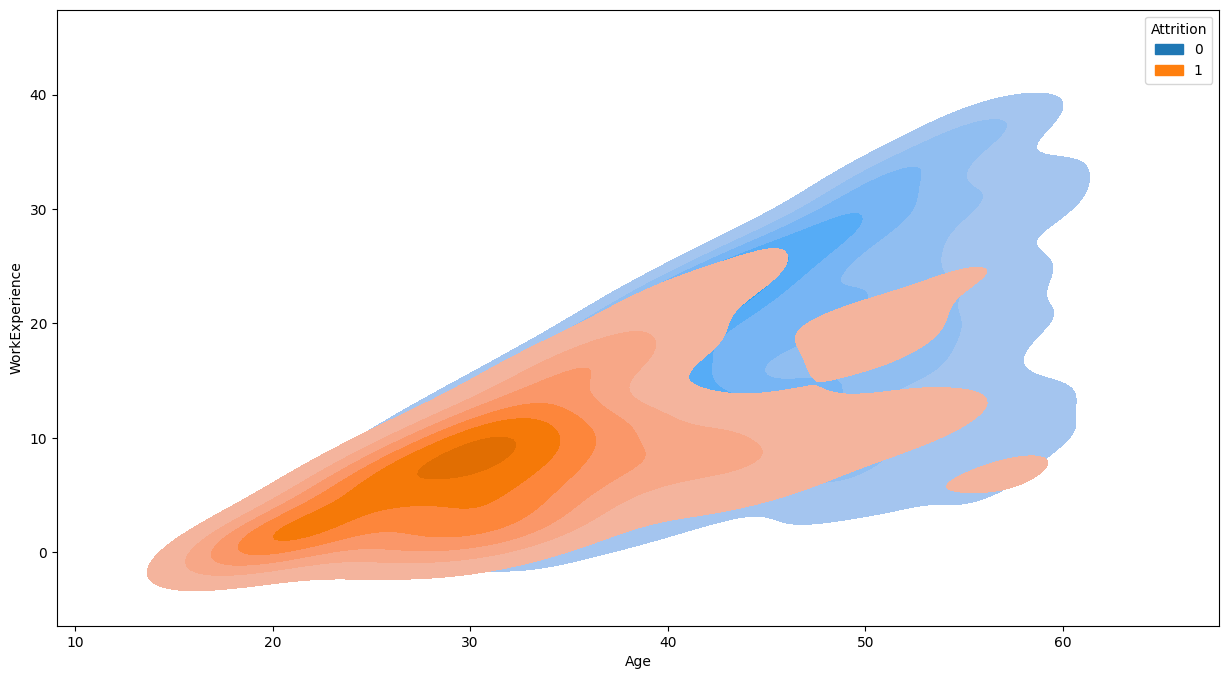

In [39]:
plt.figure(figsize=(15,8))
sns.kdeplot(data=data2,hue="Attrition", x="Age", y="WorkExperience", fill=True);

High concentration at around age 30 and work experience 5-9, meaning high attritions with employees who are in this category. Also, employees under 35 years and close to 10 years experience are more likely to live.

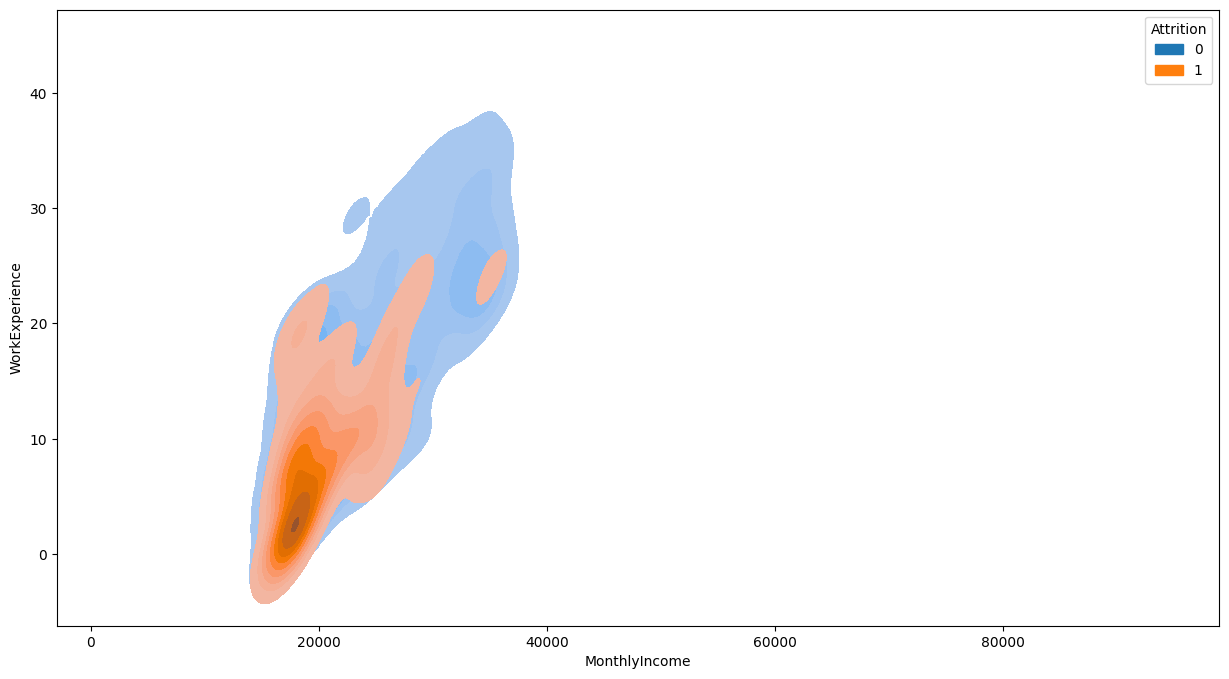

In [40]:
plt.figure(figsize=(15,8))
sns.kdeplot(data=data2,hue="Attrition", x="MonthlyIncome", y="WorkExperience", fill=True);

Employees having around 3 years work experience and 18K monthly income are most likely to leave. Also, generally employees with 5-10 years work experience and <=20K monthly income have high attritions.

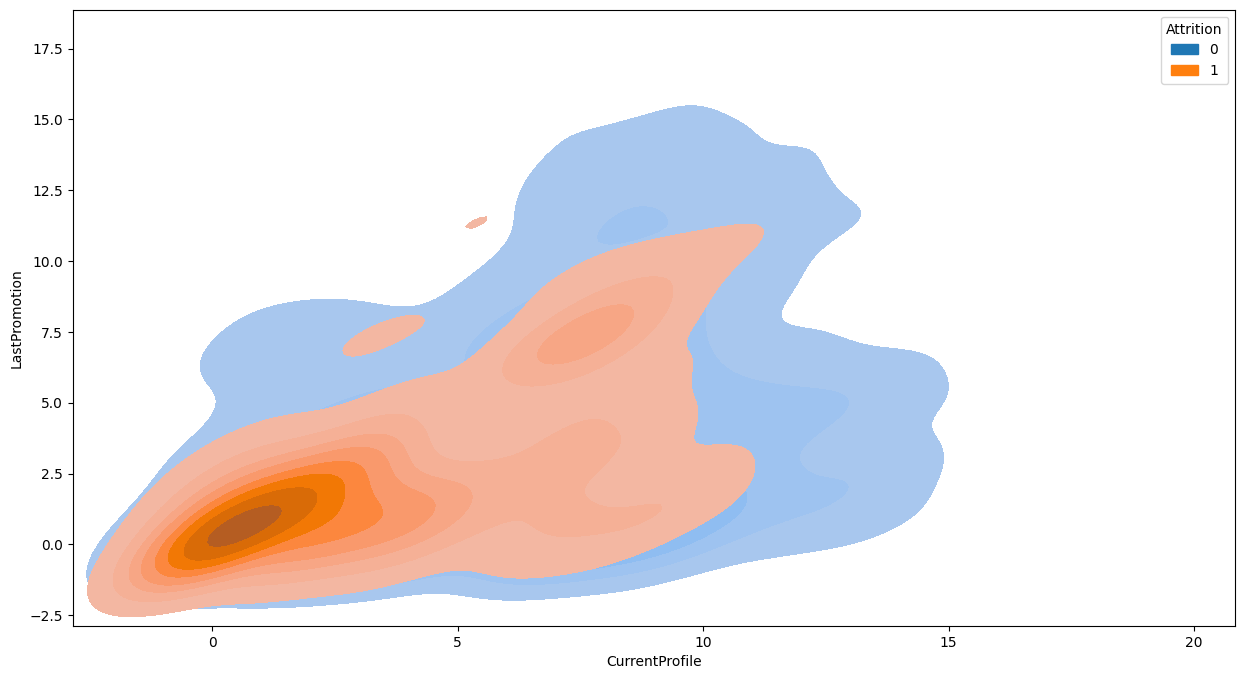

In [41]:
plt.figure(figsize=(15,8))
sns.kdeplot(data=data2,hue="Attrition", y="LastPromotion", x="CurrentProfile", fill=True);

High attritions are seen among employees who are in current profile since 2.5 years and last promotion was not more than 2.5 years ago.

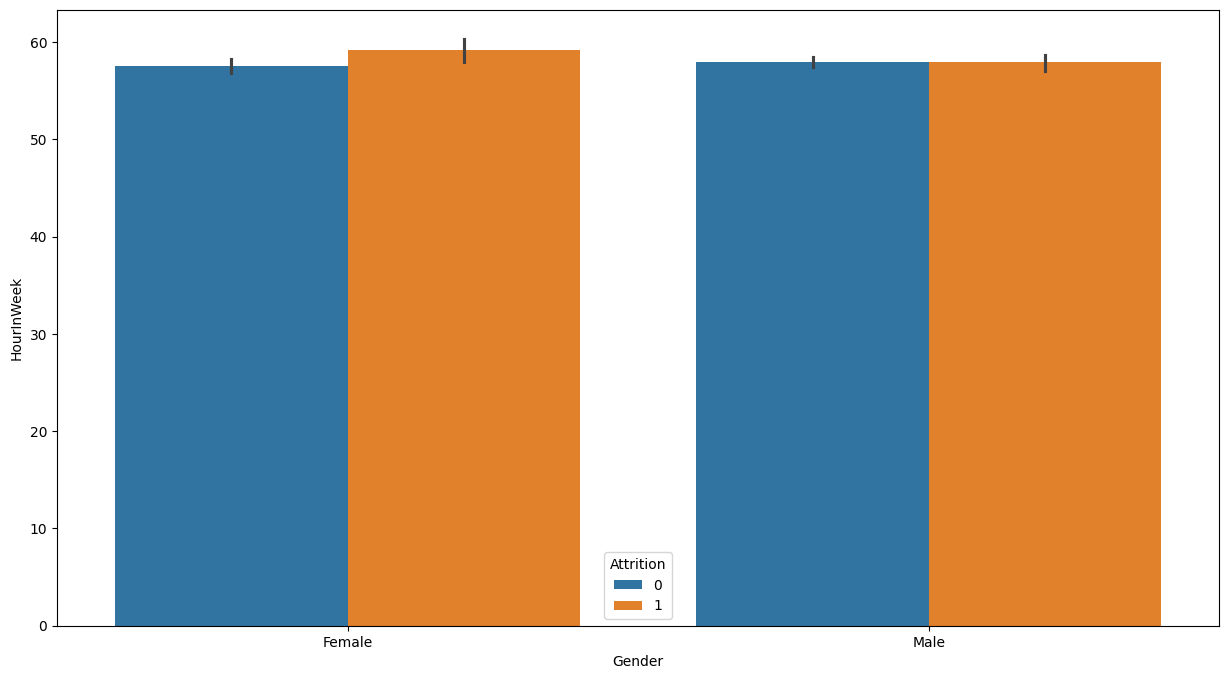

In [42]:
plt.figure(figsize=(15,8))
sns.barplot(data=data2, x="Gender", y="HourInWeek", hue="Attrition");

Women who are working for more number of hours in a weeek in an average have high attrition rate whereas, men who are working for slightly less number of hours in a week in an average are leaving.

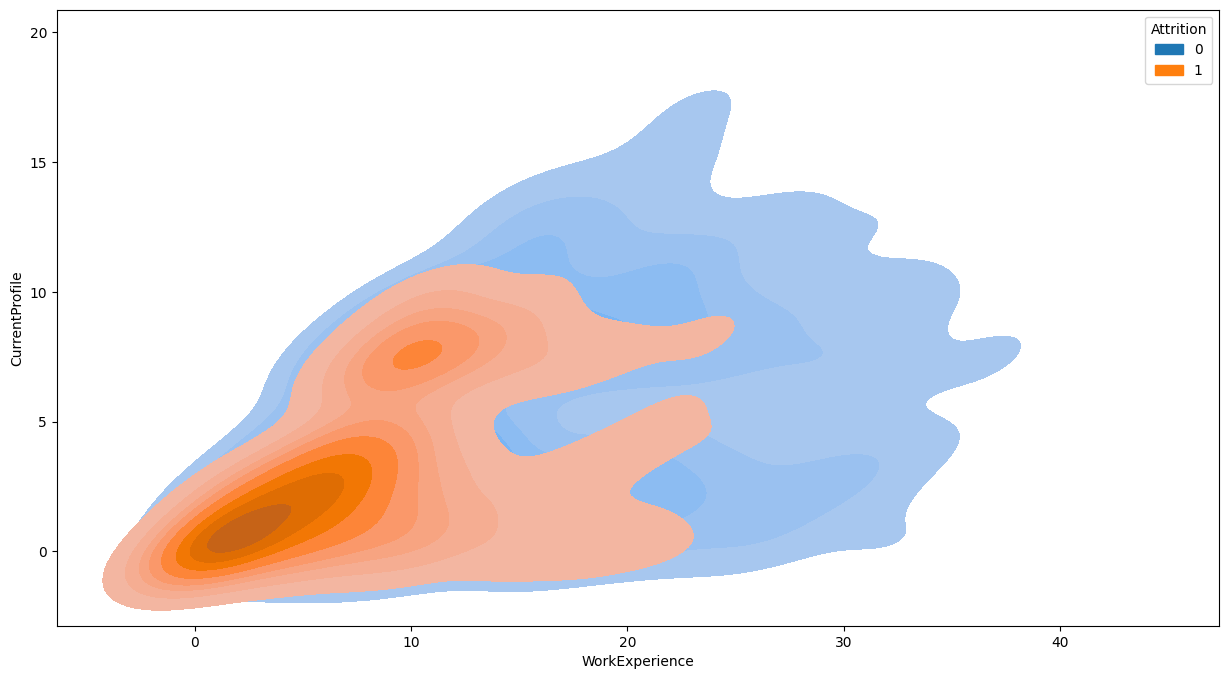

In [43]:
plt.figure(figsize=(15,8))
sns.kdeplot(data=data2,hue="Attrition", y="CurrentProfile", x="WorkExperience", fill=True);

Employees who are working in same profile since 1.5 years and having less than 4 years of work experience are leaving. Also, those who have less than 7 years work experience and working in same profile since 3 years are also likely to leave.

In [44]:
data2 = data2.drop(columns={"HomeToWork_bin","HourInWeek_bin"},axis=1)

In [45]:
data2.dtypes

Attrition             category
Age                      Int64
TravelProfile         category
Department            category
HomeToWork             float64
EducationField        category
Gender                category
HourInWeek             float64
Involvement           category
WorkLifeBalance       category
Designation           category
JobSatisfaction       category
ESOPs                    int64
NumCompaniesWorked       int64
OverTime                 int64
SalaryHikelastYear     float64
WorkExperience         float64
LastPromotion          float64
CurrentProfile         float64
MaritalStatus         category
MonthlyIncome          float64
dtype: object

## Missing values Imputation

In [46]:
#Using mode method to fill missing values for object variables.

data2["Department"]=data2["Department"].fillna(data2["Department"].mode()[0])
data2["Gender"]=data2["Gender"].fillna(data2["Gender"].mode()[0])
data2["Designation"]=data2["Designation"].fillna(data2["Designation"].mode()[0])

In [47]:
#Using median method to fill missing values for numerical variables since the data is skewed.

cols = ["Age", "HomeToWork", "HourInWeek", "SalaryHikelastYear", "WorkExperience", "LastPromotion", "CurrentProfile", "MonthlyIncome"]

for col in cols:
    data2[col].fillna(data2[col].median(), inplace=True)

In [48]:
data2.isnull().sum()

Attrition             0
Age                   0
TravelProfile         0
Department            0
HomeToWork            0
EducationField        0
Gender                0
HourInWeek            0
Involvement           0
WorkLifeBalance       0
Designation           0
JobSatisfaction       0
ESOPs                 0
NumCompaniesWorked    0
OverTime              0
SalaryHikelastYear    0
WorkExperience        0
LastPromotion         0
CurrentProfile        0
MaritalStatus         0
MonthlyIncome         0
dtype: int64

## Outlier Detection

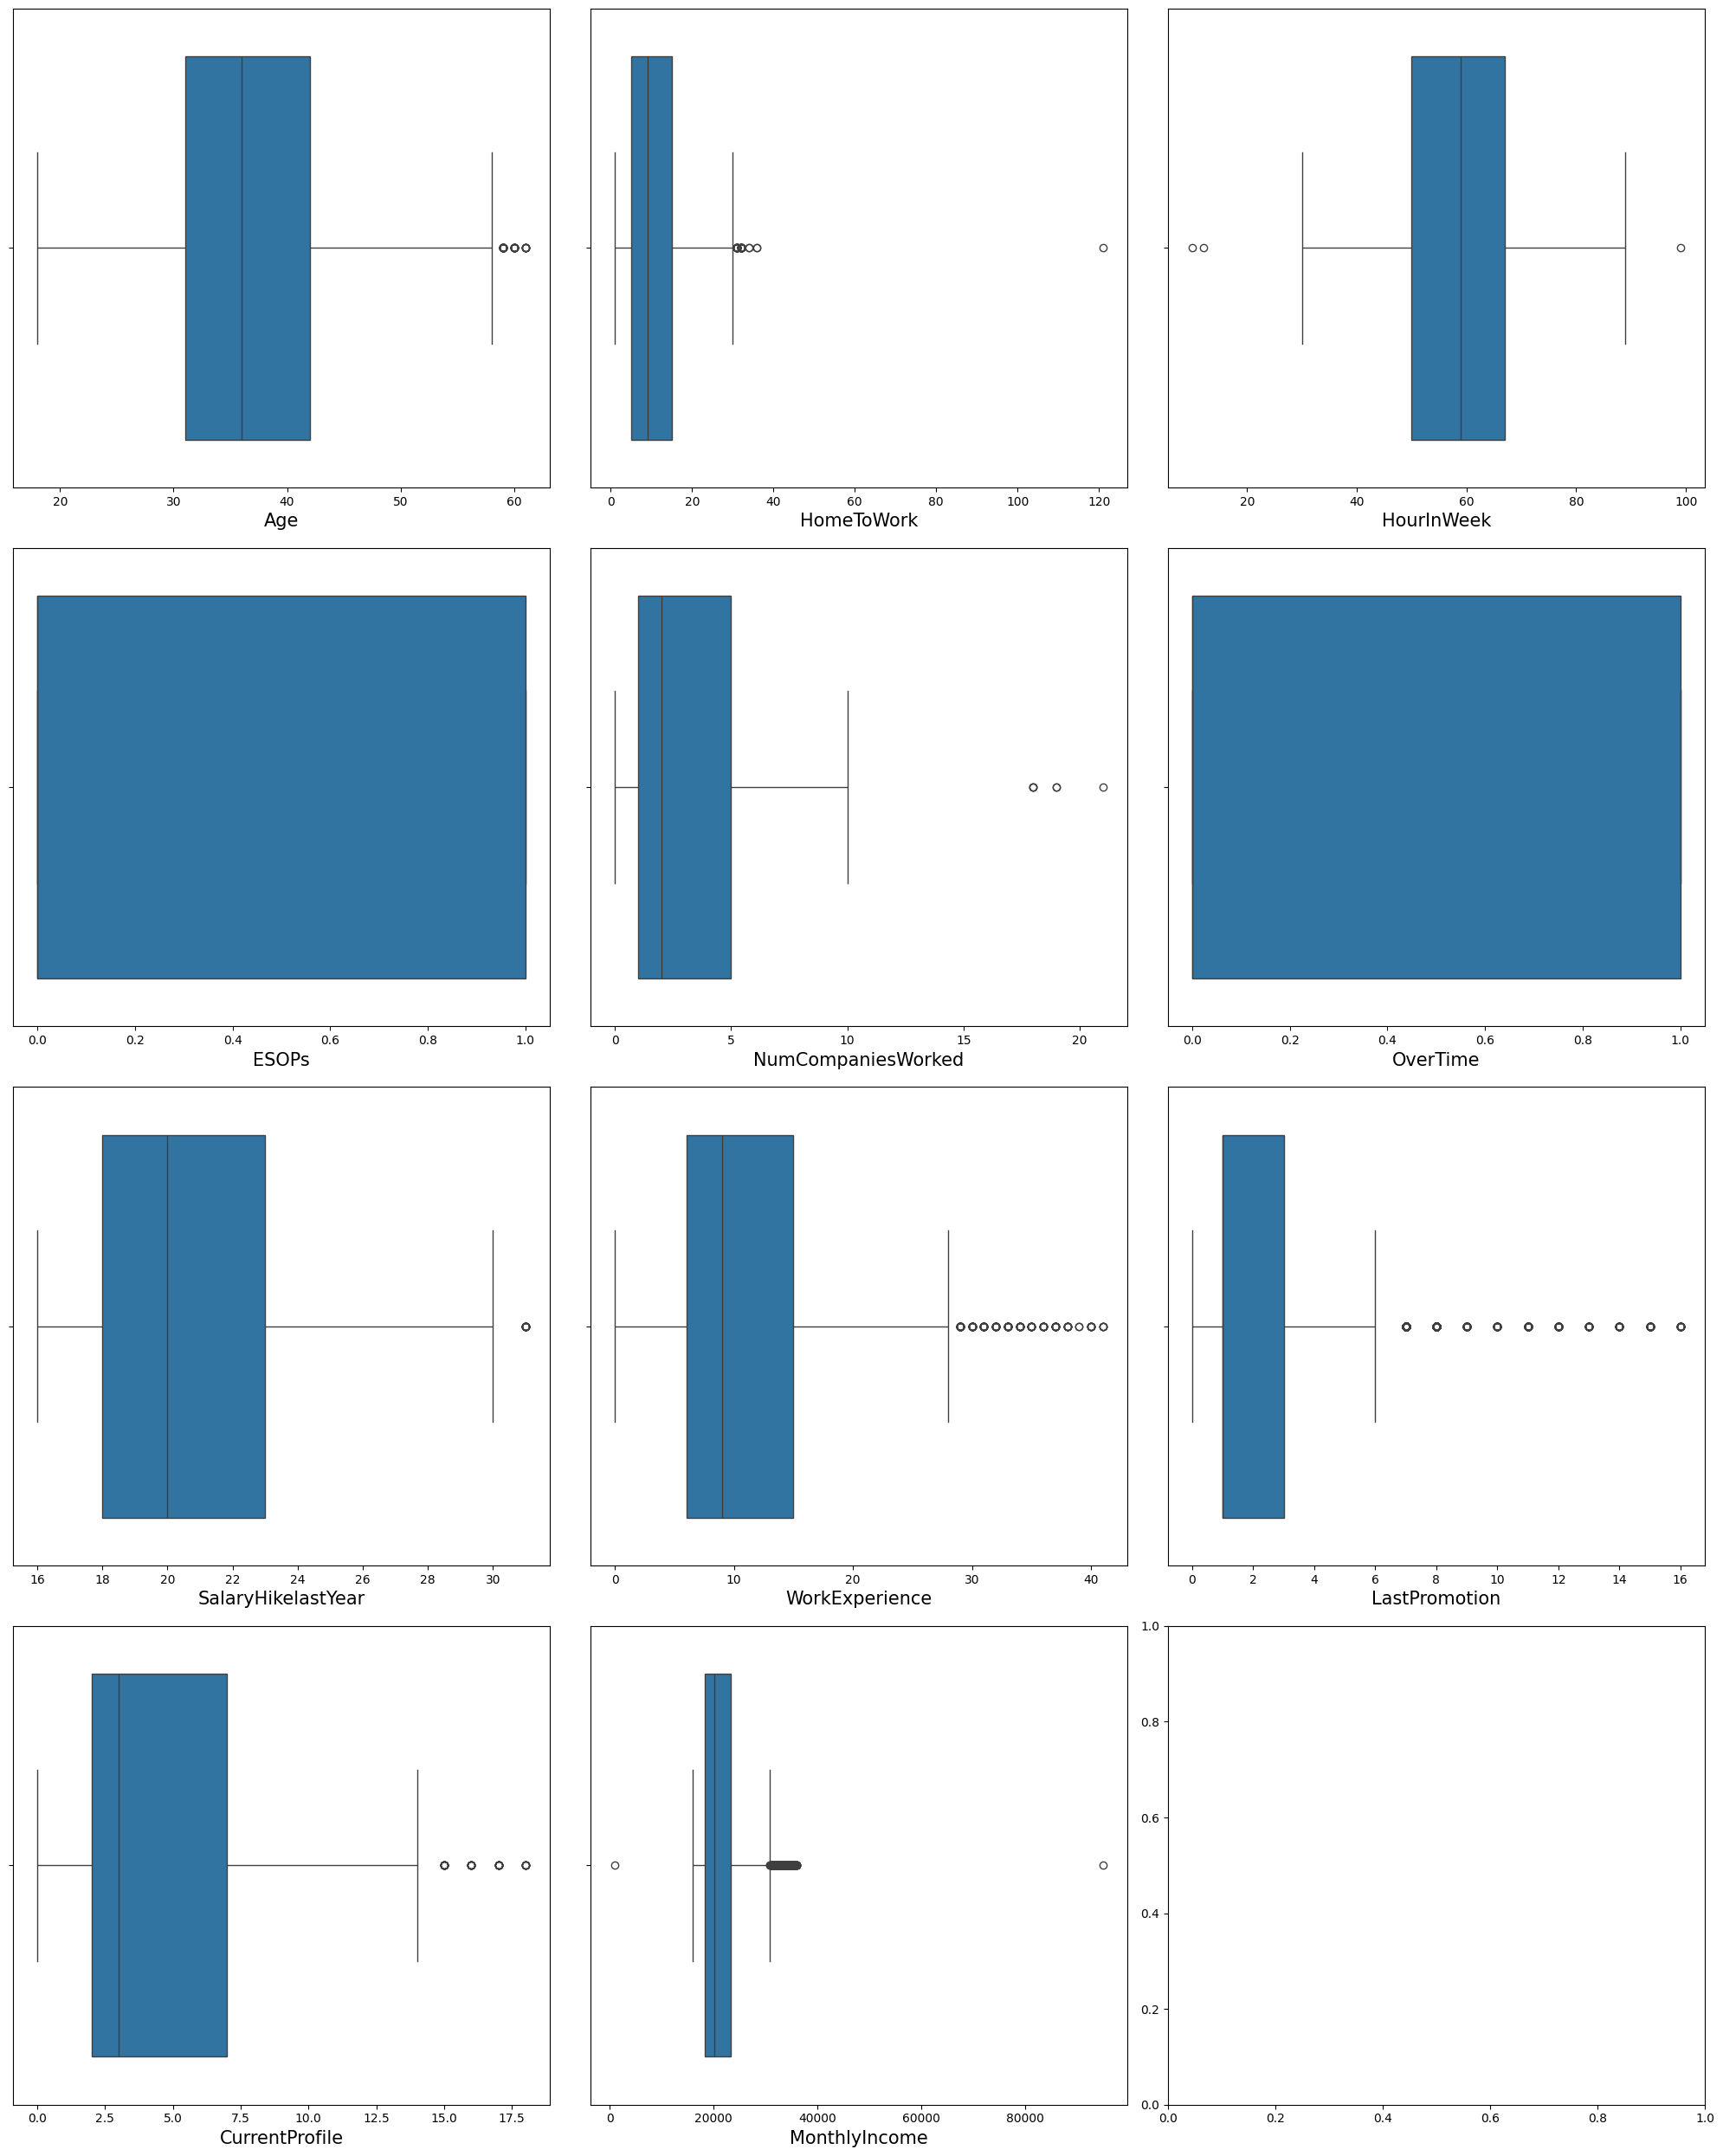

In [49]:
#Visualizing distributions and identifing outliers

fig, axs = plt.subplots(nrows=4, ncols=3, figsize=(20,25))
axs = axs.flatten()

for i, col in enumerate(numerical):
    sns.boxplot(data=data2, x=col, ax=axs[i])
    axs[i].set_xlabel(col, fontsize=15)
fig.tight_layout()
plt.show()

In [50]:
#outliers detection

def outliers(col):
    Q1 = col.quantile(0.25)
    Q3 = col.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outlier_values = col[(col < lower_bound) | (col > upper_bound)]
    outlier_proportion = round((len(outlier_values) / col.count())*100, 2)
    return outlier_proportion

In [51]:
for col in numerical:
    print("Outlier Proportion of {}:".format(col),outliers(data2[col]))

Outlier Proportion of Age: 1.33
Outlier Proportion of HomeToWork: 1.47
Outlier Proportion of HourInWeek: 0.06
Outlier Proportion of ESOPs: 0.0
Outlier Proportion of NumCompaniesWorked: 0.12
Outlier Proportion of OverTime: 0.0
Outlier Proportion of SalaryHikelastYear: 0.42
Outlier Proportion of WorkExperience: 4.09
Outlier Proportion of LastPromotion: 12.84
Outlier Proportion of CurrentProfile: 0.85
Outlier Proportion of MonthlyIncome: 7.72


### Observations:

Note: 
1. 0% to 5%: Very few outliers — usually safe to ignore or cap if needed.
2. 5% to 10%: Moderate outliers — investigate, consider capping or transforming.
3. More than 10%: High outliers — deep analysis needed to determine if values are valid, require transformation, or if the feature needs revision

#### Variables WorkExperience and MonthlyIncome can be capped as the outlier proportion is moderate.
#### Variable LastPromotion can be log transformed as these are crucial values and does not make sense to cap them

## Handling Outliers

In [52]:
#Capping outliers

columns_to_cap = ['WorkExperience', 'MonthlyIncome']

def cap_outliers(col):
    Q1 = col.quantile(0.25)
    Q3 = col.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return col.apply(lambda y: upper_bound if y > upper_bound else y).apply(lambda y: lower_bound if y < lower_bound else y)

In [53]:
for col in columns_to_cap:
    data2[col]=cap_outliers(data2[col])

In [54]:
#log transforming outliers

columns_to_log = ['LastPromotion']

for col in columns_to_log:
    data2[f'{col}_log']=np.log1p(data2[col])

In [55]:
data2=data2.drop("LastPromotion",axis=1)

In [56]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5180 entries, 0 to 5179
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Attrition           5180 non-null   category
 1   Age                 5180 non-null   Int64   
 2   TravelProfile       5180 non-null   category
 3   Department          5180 non-null   category
 4   HomeToWork          5180 non-null   float64 
 5   EducationField      5180 non-null   category
 6   Gender              5180 non-null   category
 7   HourInWeek          5180 non-null   float64 
 8   Involvement         5180 non-null   category
 9   WorkLifeBalance     5180 non-null   category
 10  Designation         5180 non-null   category
 11  JobSatisfaction     5180 non-null   category
 12  ESOPs               5180 non-null   int64   
 13  NumCompaniesWorked  5180 non-null   int64   
 14  OverTime            5180 non-null   int64   
 15  SalaryHikelastYear  5180 non-null   fl

In [57]:
numerical = []
categorical = []
for col in data2.select_dtypes(exclude=['object','category']).columns:
    numerical.append(col)
for col1 in data2.select_dtypes(include=['object','category']).columns:
    categorical.append(col1)

In [58]:
for col in numerical:
    print("Outlier Proportion of {}:".format(col),outliers(data2[col]))

Outlier Proportion of Age: 1.33
Outlier Proportion of HomeToWork: 1.47
Outlier Proportion of HourInWeek: 0.06
Outlier Proportion of ESOPs: 0.0
Outlier Proportion of NumCompaniesWorked: 0.12
Outlier Proportion of OverTime: 0.0
Outlier Proportion of SalaryHikelastYear: 0.42
Outlier Proportion of WorkExperience: 0.0
Outlier Proportion of CurrentProfile: 0.85
Outlier Proportion of MonthlyIncome: 0.0
Outlier Proportion of LastPromotion_log: 4.5


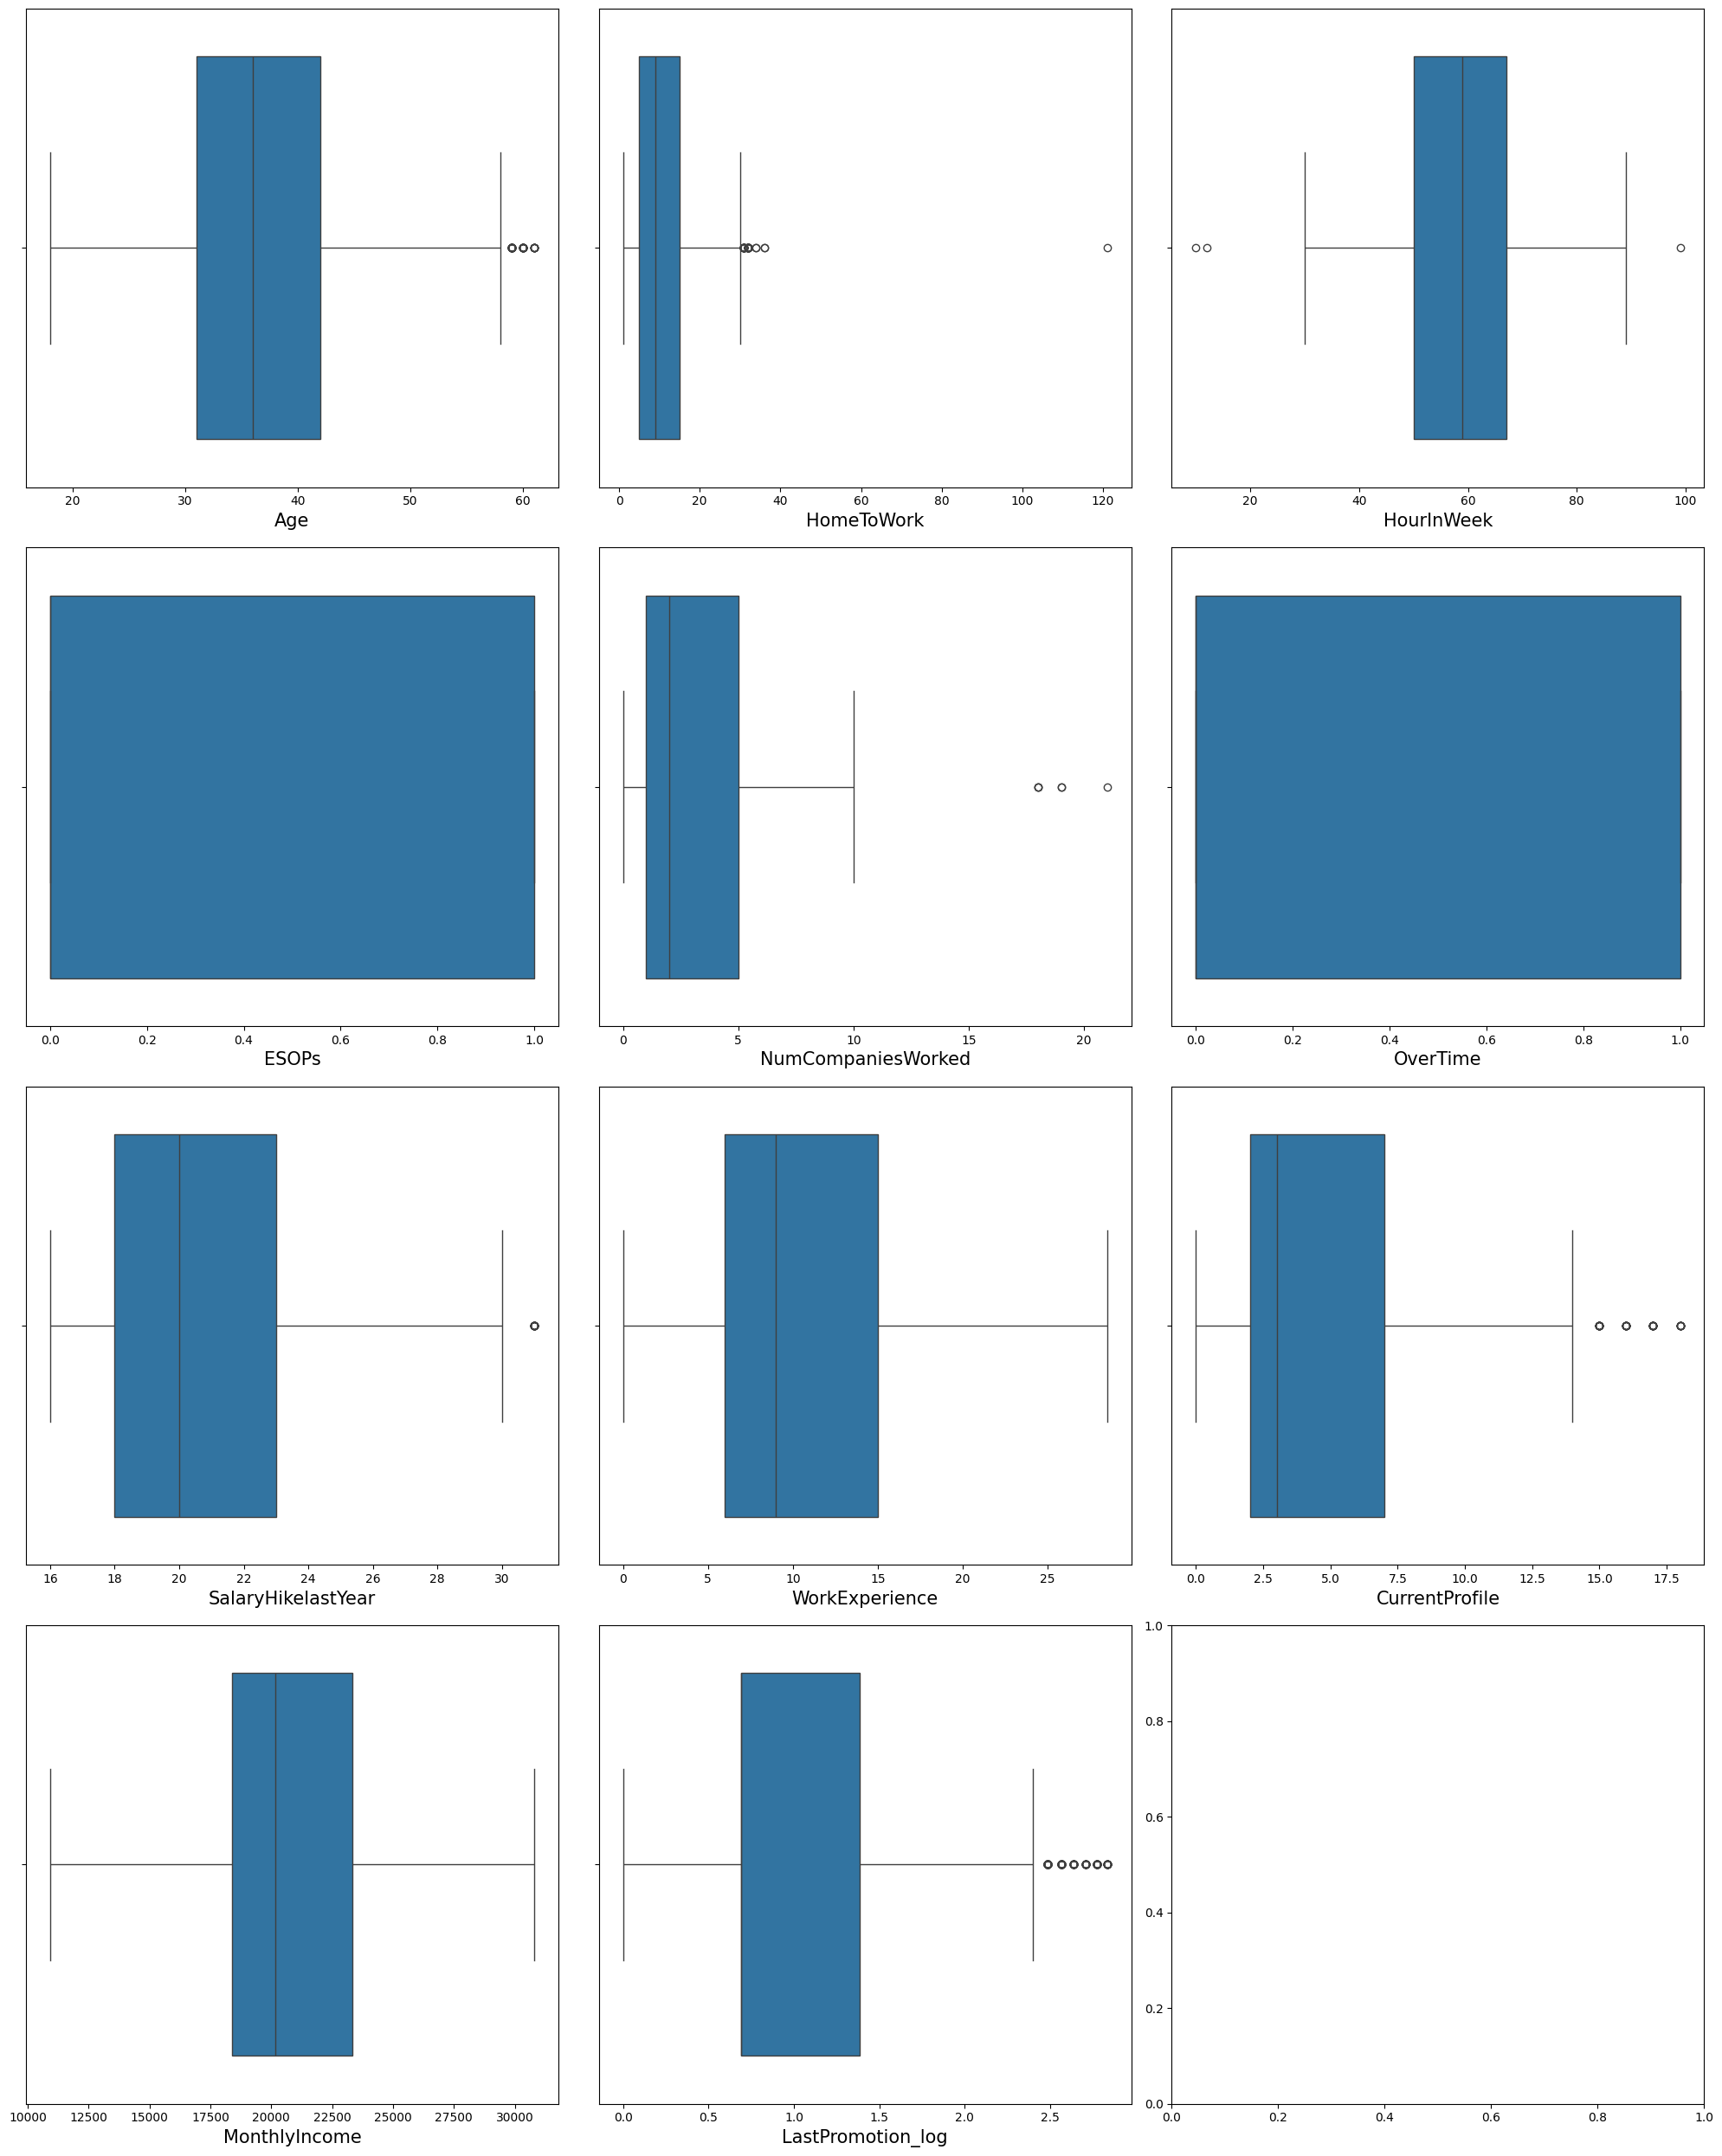

In [59]:
fig, axs = plt.subplots(nrows=4, ncols=3, figsize=(20,25))
axs = axs.flatten()

for i, col in enumerate(numerical):
    sns.boxplot(data=data2, x=col, ax=axs[i])
    axs[i].set_xlabel(col, fontsize=15)
fig.tight_layout()
plt.show()

In [60]:
#Checking skewness for numeric columns
skewness = data2.select_dtypes(exclude=['object', 'category']).skew().sort_values(ascending=False)
print(skewness)

HomeToWork             1.33322
NumCompaniesWorked    1.126677
MonthlyIncome         1.084646
WorkExperience        0.905647
CurrentProfile        0.883728
SalaryHikelastYear    0.808023
OverTime              0.804191
LastPromotion_log     0.526992
Age                   0.462018
ESOPs                 0.037856
HourInWeek           -0.234548
dtype: Float64


Applying log transformation for WorkExperience, HomeToWork, MonthlyIncome, SalaryHikelastYear and NumCompaniesWorked as the skewness is close to 1.

In [61]:
columns_to_log_2 = ['NumCompaniesWorked', 'HomeToWork', 'WorkExperience','MonthlyIncome','SalaryHikelastYear','CurrentProfile']

for col in columns_to_log_2:
    data2[f'{col}_log']=np.log1p(data2[col])

In [62]:
data2.drop(columns=['NumCompaniesWorked', 'HomeToWork', 'WorkExperience','MonthlyIncome','SalaryHikelastYear','CurrentProfile'], axis=1,inplace=True)

In [63]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5180 entries, 0 to 5179
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   Attrition               5180 non-null   category
 1   Age                     5180 non-null   Int64   
 2   TravelProfile           5180 non-null   category
 3   Department              5180 non-null   category
 4   EducationField          5180 non-null   category
 5   Gender                  5180 non-null   category
 6   HourInWeek              5180 non-null   float64 
 7   Involvement             5180 non-null   category
 8   WorkLifeBalance         5180 non-null   category
 9   Designation             5180 non-null   category
 10  JobSatisfaction         5180 non-null   category
 11  ESOPs                   5180 non-null   int64   
 12  OverTime                5180 non-null   int64   
 13  MaritalStatus           5180 non-null   category
 14  LastPromotion_log       

## Data Encoding

In [64]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
data2.Gender = le.fit_transform(data2.Gender.astype(str))

#### Male is encoded as 1 and Female as 0.

In [65]:
data2 = pd.get_dummies(data2,columns = ['TravelProfile','Designation','MaritalStatus','EducationField','Department'],drop_first=True)

In [66]:
ordinal_cols = ["JobSatisfaction", "WorkLifeBalance", "Involvement"]

for col in ordinal_cols:
    data2[col] = data2[col].astype(int)

In [67]:
data2.shape

(5180, 31)

In [68]:
data2.head(3).T

,0,1,2
Attrition,0,1,0
Age,35,32,31
Gender,1,0,0
HourInWeek,69.0,62.0,45.0
Involvement,1,4,5
WorkLifeBalance,1,3,3
JobSatisfaction,1,2,2
ESOPs,1,0,1
OverTime,1,0,0
LastPromotion_log,1.098612,0.693147,0.693147


In [69]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5180 entries, 0 to 5179
Data columns (total 31 columns):
 #   Column                            Non-Null Count  Dtype   
---  ------                            --------------  -----   
 0   Attrition                         5180 non-null   category
 1   Age                               5180 non-null   Int64   
 2   Gender                            5180 non-null   int64   
 3   HourInWeek                        5180 non-null   float64 
 4   Involvement                       5180 non-null   int64   
 5   WorkLifeBalance                   5180 non-null   int64   
 6   JobSatisfaction                   5180 non-null   int64   
 7   ESOPs                             5180 non-null   int64   
 8   OverTime                          5180 non-null   int64   
 9   LastPromotion_log                 5180 non-null   float64 
 10  NumCompaniesWorked_log            5180 non-null   float64 
 11  HomeToWork_log                    5180 non-null   float6

In [70]:
data2 = data2.astype({col: int for col in data2.select_dtypes('bool').columns})
data2["Attrition"] = data2["Attrition"].astype(int)

In [71]:
data2.head(3).T

,0,1,2
Attrition,0,1,0
Age,35,32,31
Gender,1,0,0
HourInWeek,69.0,62.0,45.0
Involvement,1,4,5
WorkLifeBalance,1,3,3
JobSatisfaction,1,2,2
ESOPs,1,0,1
OverTime,1,0,0
LastPromotion_log,1.098612,0.693147,0.693147


Now we have all data types in numerical data type. We are now ready for splitting, scaling and model building.

In [73]:
data2.to_csv("Attrition_Data_Preprocessed.csv", index=False)